# VUI - Seminarska vaja

Uporabljena baza: diabetes_012_health_indicators_BRFSS2015.csv\
Link do baze: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download&select=diabetes_012_health_indicators_BRFSS2015.csv \
Študent: David Dugar

### Predobdelava
->filtriranje podatkov kjer je feature Diabetes_012 nastavljen na 1 (prediabetes)

In [1]:
import pandas as pd

file_path = 'diabetes_012_health_indicators_BRFSS2015_253680.csv'
data = pd.read_csv(file_path)
filtered_data = data[data['Diabetes_012'] != 1]

#ponastavi indeks, da ni praznih vrstic
filtered_data.reset_index(drop=True, inplace=True)

#spremeni vrednosti v stolpcu Diabetes_012 iz 2 v 1
filtered_data['Diabetes_012'] = filtered_data['Diabetes_012'].replace(2, 1)

output_path = 'filtered_diabetes_01_health_indicators_BRFSS2015_.csv'
filtered_data.to_csv(output_path, index=False)

print(f"Podatki so bili uspešno filtrirani in shranjeni v: {output_path}")

C:\Users\david\AppData\Local\Temp\ipykernel_21500\2266274351.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Diabetes_012'] = filtered_data['Diabetes_012'].replace(2, 1)


Podatki so bili uspešno filtrirani in shranjeni v: filtered_diabetes_01_health_indicators_BRFSS2015_.csv


## Deskriptivna statistika vseh značilk prisotnih v bazi

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display, Markdown

file_path = "diabetes_012_health_indicators_BRFSS2015_253680.csv"
data = pd.read_csv(file_path)

def show_nominal_data(feature):
    # Izris stolpičnega grafa za povprečne vrednosti
    plt.figure(figsize=(10, 6))
    mean_values = data.groupby('Diabetes_012')[feature].mean().reset_index()
    sns.barplot(x='Diabetes_012', y=feature, data=mean_values, hue='Diabetes_012', palette="Set2", dodge=False, legend=False)

    # Dodajanje povprečnih vrednosti na stolpce
    for i, mean in enumerate(mean_values[feature]):
        plt.text(i, mean, f'{mean:.2f}', color='red', ha='center', va='bottom', fontsize=10)

    # Prilagoditev osi in naslovov
    plt.title(f"Stolpični graf povprečnih vrednosti za značilko: {feature}", fontsize=14)
    plt.xlabel("Status diabetesa (0: Brez, 1: Prediabetes, 2: Diabetes)", fontsize=12)
    plt.ylabel(f"Povprečna vrednost {feature}", fontsize=12)
    plt.tight_layout()
    plt.show()

    #Prikaz števila primerov za vsako Diabetes_012 skupino
    plt.figure(figsize=(10, 6))
    counts = data.groupby('Diabetes_012')[feature].value_counts().unstack(fill_value=0)
    counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(10, 6))
    plt.title(f"Stolpični graf števila primerov za značilko: {feature}", fontsize=14)
    plt.xlabel("Status diabetesa (0: Brez, 1: Prediabetes, 2: Diabetes)", fontsize=12)
    plt.ylabel(f"Število primerov za {feature}", fontsize=12)
    plt.tight_layout()
    plt.show()

    #izpis števila primerov s tabeličnim prikazom
    counts = data.groupby('Diabetes_012')[feature].value_counts().unstack(fill_value=0)
    display(Markdown(f"Število primerov za značilko **{feature}**"))
    display(counts)

    #Prikaz relativnih deležev
    relative_counts = counts.div(counts.sum(axis=1), axis=0)
    plt.figure(figsize=(10, 6))
    (relative_counts * 100).plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(10, 6))

    # Naslovi in prilagoditve
    plt.title(f"Relativni deleži za značilko: {feature}", fontsize=14)
    plt.xlabel("Status diabetesa (0: Brez, 1: Prediabetes, 2: Diabetes)", fontsize=12)
    plt.ylabel("Relativni delež (%)", fontsize=12)
    plt.tight_layout()
    plt.show()

    #izpis relativnih deležev s tabeličnim prikazom
    relative_counts = counts.div(counts.sum(axis=1), axis=0)
    display(Markdown(f"Relativni deleži za značilko **{feature}**:"))
    display((relative_counts * 100).round(2))

## HighBP grafi

ne visok krvni pritisk - 0\
visok krvni pritisk - 1

-- nominalna spremenljivka

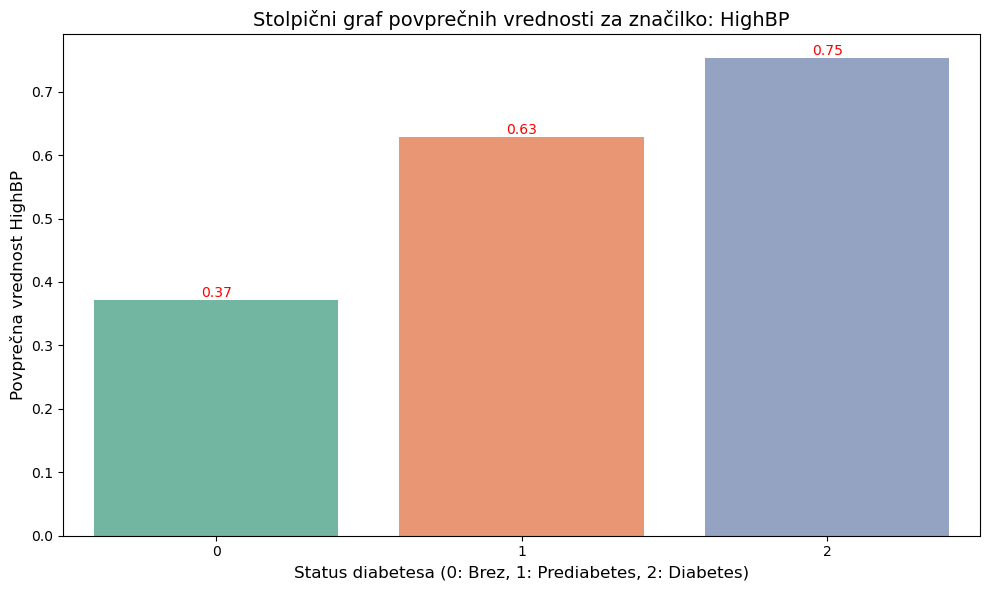

<Figure size 1000x600 with 0 Axes>

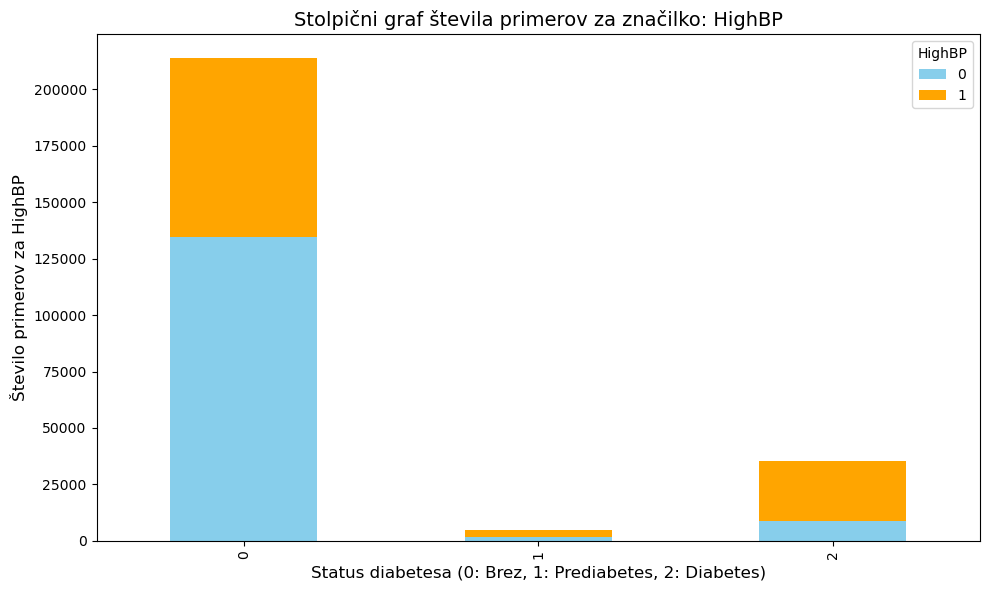

Število primerov za značilko **HighBP**

HighBP,0,1
Diabetes_012,,
0,134391,79312
1,1718,2913
2,8742,26604


<Figure size 1000x600 with 0 Axes>

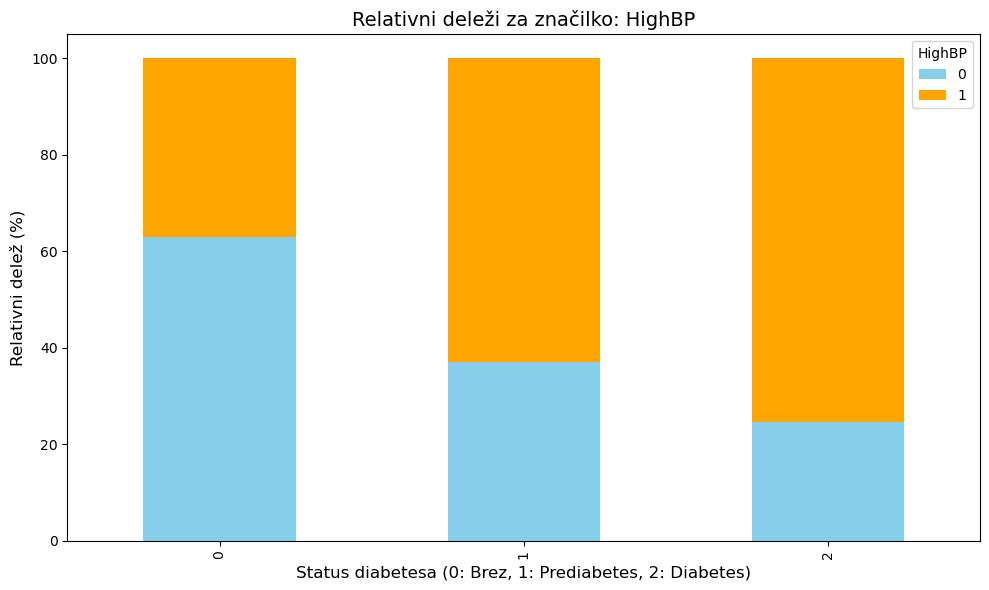

Relativni deleži za značilko **HighBP**:

HighBP,0,1
Diabetes_012,,
0,62.89,37.11
1,37.10,62.90
2,24.73,75.27


In [10]:
show_nominal_data('HighBP')

## HighChol grafi

ne visok holesterol - 0\
visok holesterol - 1

-- nominalna spremenljivka

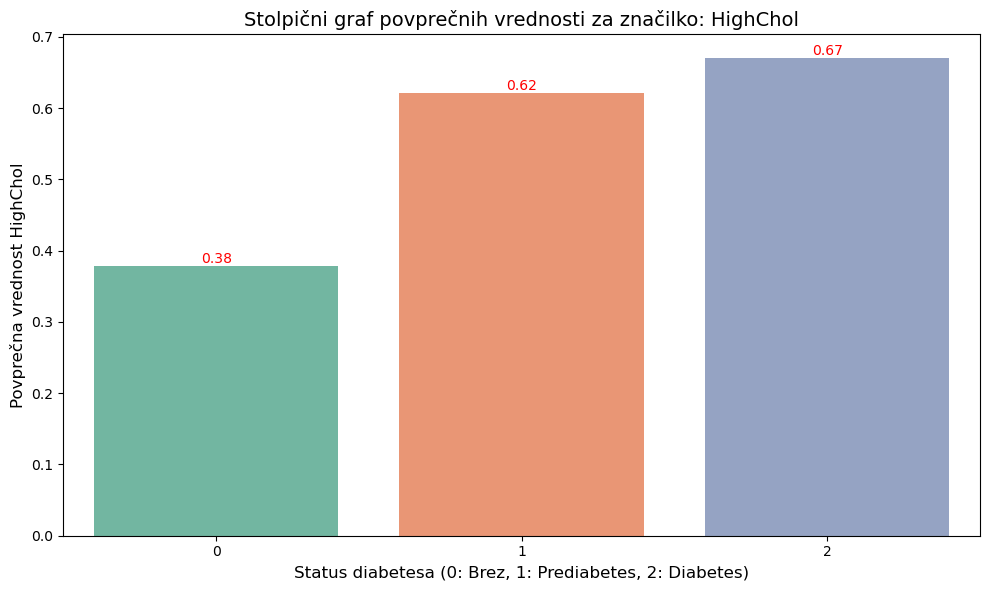

<Figure size 1000x600 with 0 Axes>

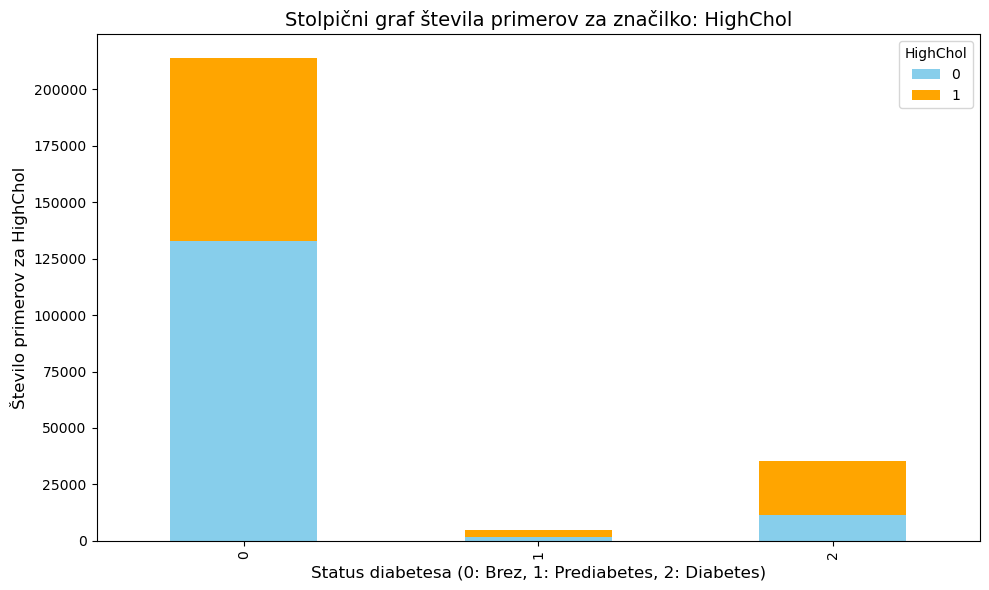

Število primerov za značilko **HighChol**

HighChol,0,1
Diabetes_012,,
0,132673,81030
1,1756,2875
2,11660,23686


<Figure size 1000x600 with 0 Axes>

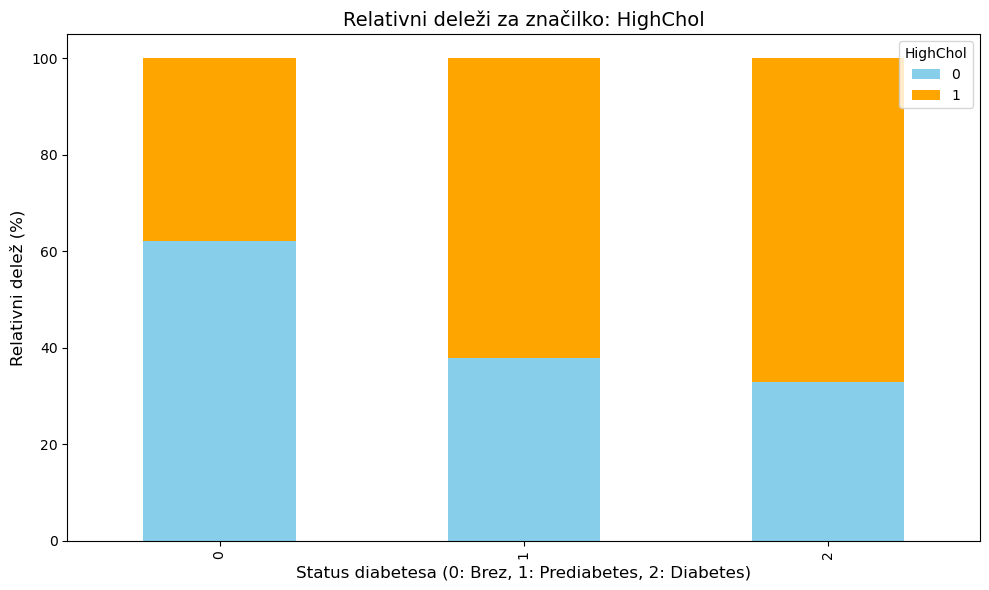

Relativni deleži za značilko **HighChol**:

HighChol,0,1
Diabetes_012,,
0,62.08,37.92
1,37.92,62.08
2,32.99,67.01


In [11]:
show_nominal_data('HighChol')

## CholCheck grafi

Prečekiran holesterol v zadnjih 5 letih
NE - 0\
DA - 1

-- nominalna spremenljivka

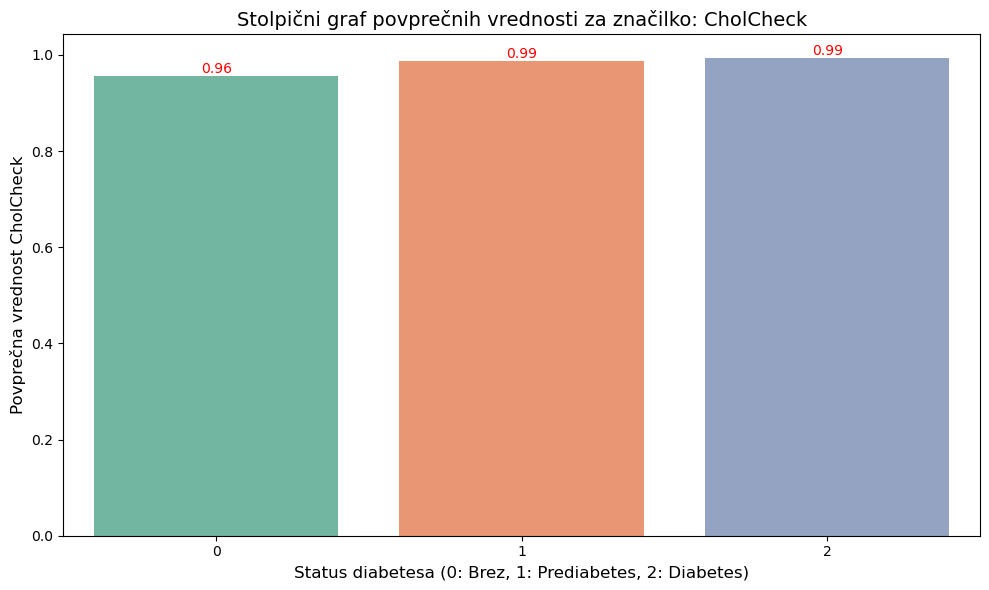

<Figure size 1000x600 with 0 Axes>

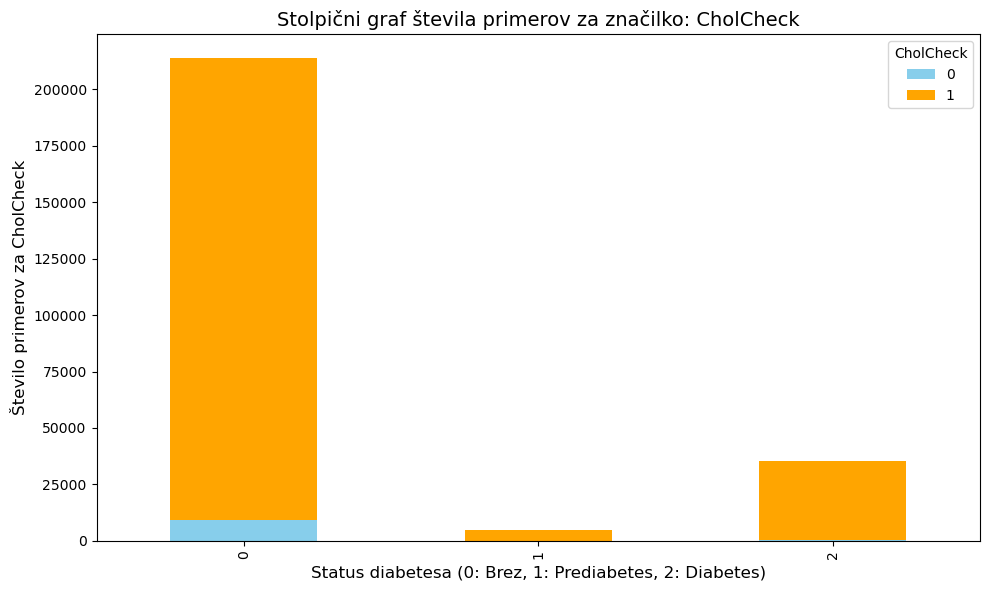

Število primerov za značilko **CholCheck**

CholCheck,0,1
Diabetes_012,,
0,9167,204536
1,62,4569
2,241,35105


<Figure size 1000x600 with 0 Axes>

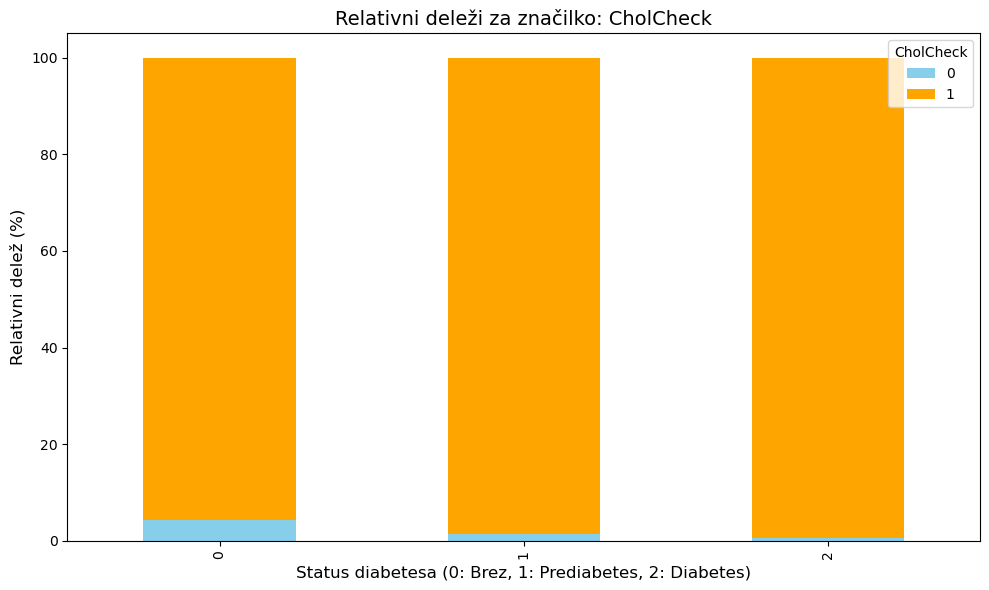

Relativni deleži za značilko **CholCheck**:

CholCheck,0,1
Diabetes_012,,
0,4.29,95.71
1,1.34,98.66
2,0.68,99.32


In [12]:
show_nominal_data('CholCheck')

## BMI grafi
(Body Mass Index oz. Indeks telesne mase - ITM)

ITM * 100 je realni indeks telesne mase (40 iz tabele je dejansko 4000)

-- kvantitativna spremenljivka

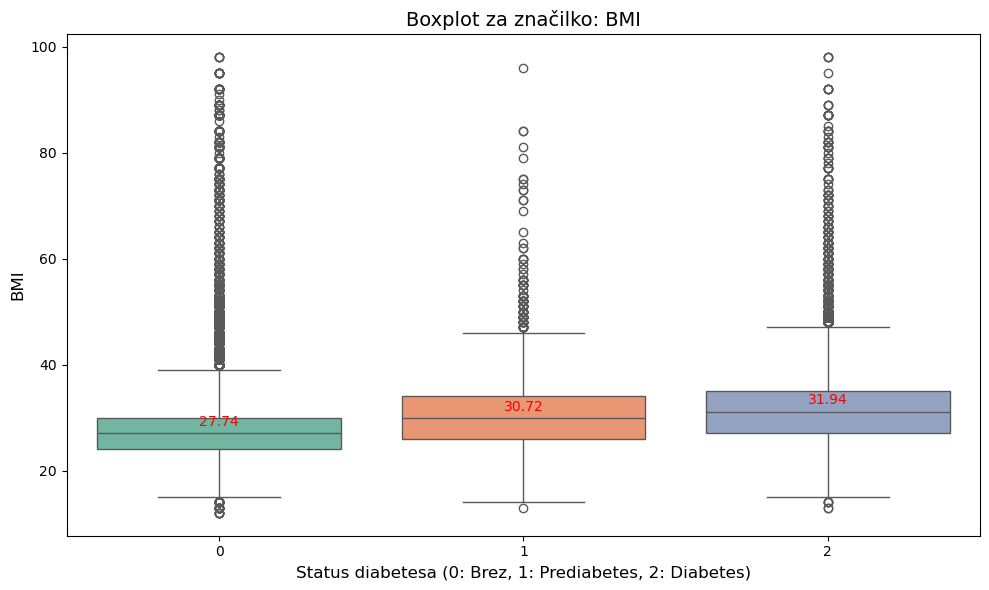

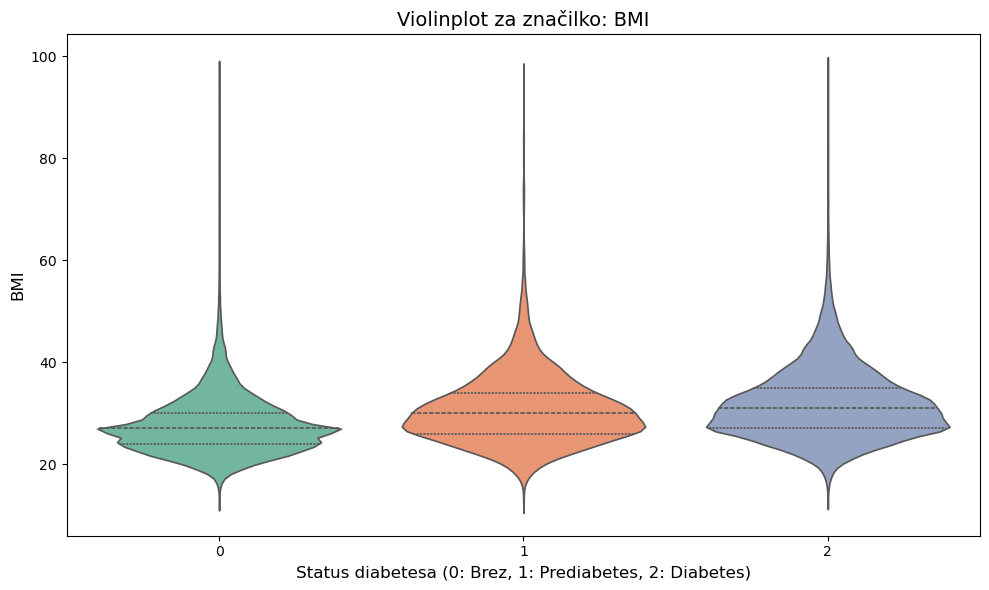

In [49]:
feature = 'BMI'

# Izris boxplota
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y=feature, data=data, palette="Set2", hue='Diabetes_012', legend=False)

# Dodajanje povprečne vrednosti na boxplot
mean_values = data.groupby('Diabetes_012')[feature].mean()
for i, mean in enumerate(mean_values):
    plt.text(i, mean, f'{mean:.2f}', color='red', ha='center', va='bottom', fontsize=10)

# Prilagoditev osi in naslovov
plt.title(f"Boxplot za značilko: {feature}", fontsize=14)
plt.xlabel("Status diabetesa (0: Brez, 1: Prediabetes, 2: Diabetes)", fontsize=12)
plt.ylabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

#alternativni prikaz podatkov
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes_012', y=feature, data=data, palette="Set2", inner="quartile", hue='Diabetes_012', legend=False)

# Naslovi in prilagoditve
plt.title(f"Violinplot za značilko: {feature}", fontsize=14)
plt.xlabel("Status diabetesa (0: Brez, 1: Prediabetes, 2: Diabetes)", fontsize=12)
plt.ylabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

## Smoker grafi

Ali je anketiranec kadilec ali ne

-- nominalna spremenljivka

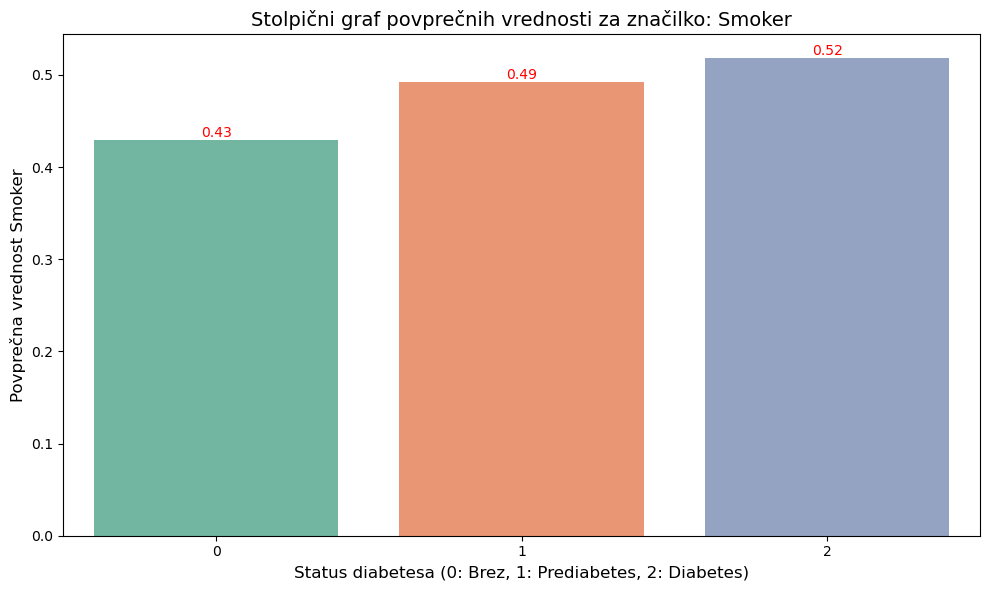

<Figure size 1000x600 with 0 Axes>

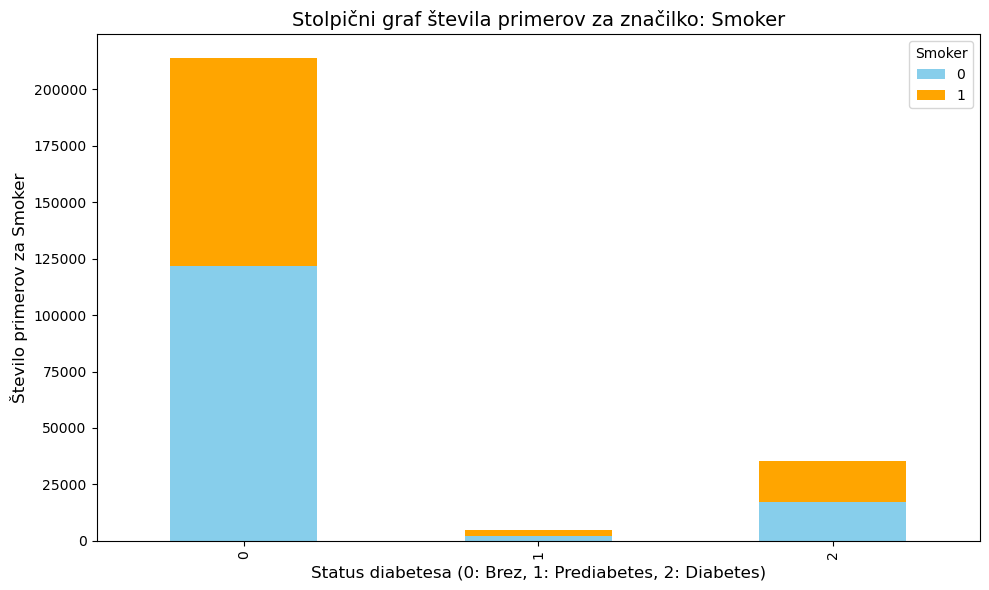

Število primerov za značilko **Smoker**

Smoker,0,1
Diabetes_012,,
0,121879,91824
1,2349,2282
2,17029,18317


<Figure size 1000x600 with 0 Axes>

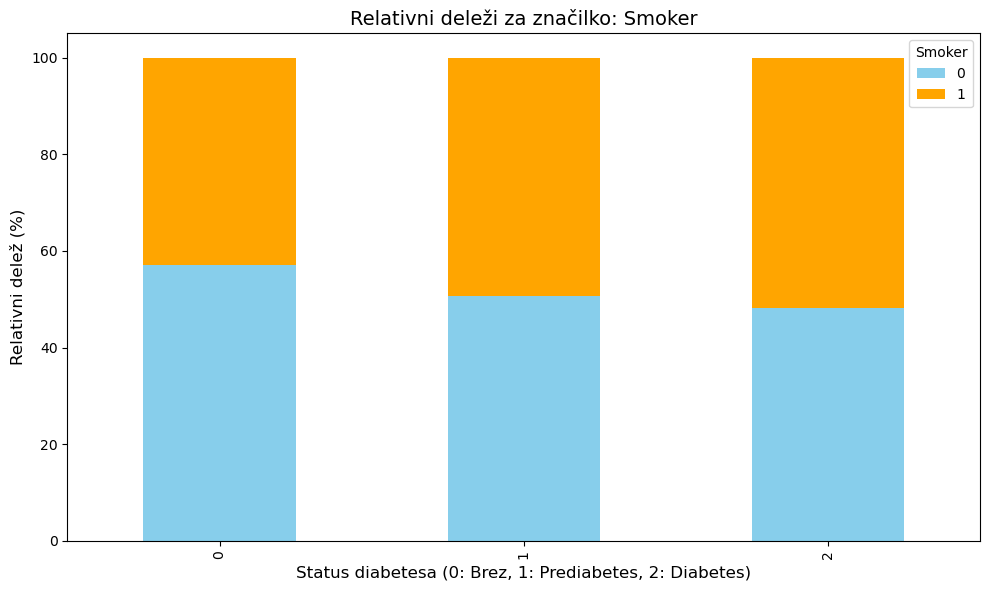

Relativni deleži za značilko **Smoker**:

Smoker,0,1
Diabetes_012,,
0,57.03,42.97
1,50.72,49.28
2,48.18,51.82


In [13]:
show_nominal_data('Smoker')

## Stroke grafi

Ali je anketirancu bilo kdaj od zdravstvenega osebja povedano, da je imel/imela kap

-- nominalna spremenljivka

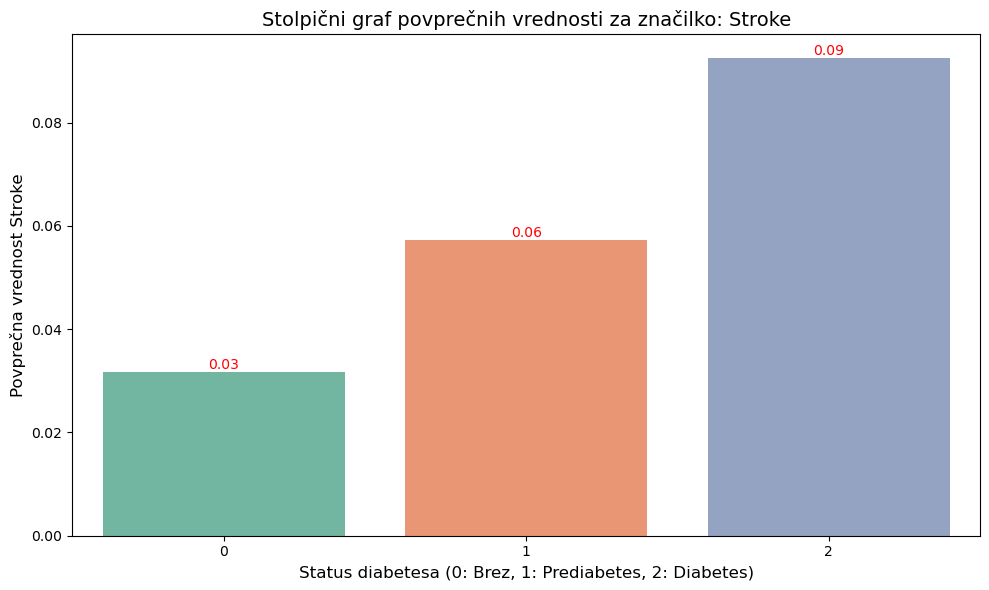

<Figure size 1000x600 with 0 Axes>

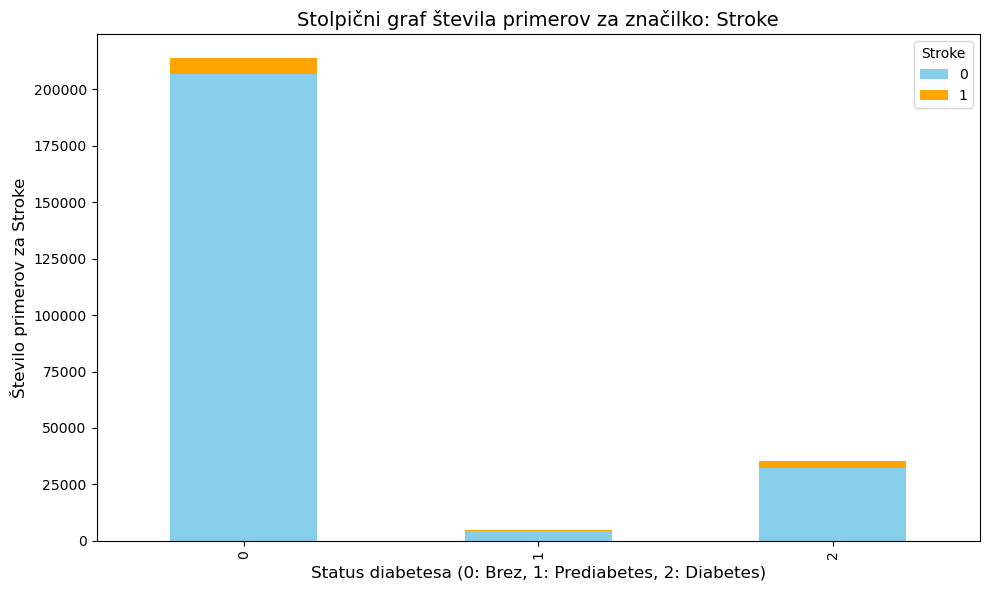

Število primerov za značilko **Stroke**

Stroke,0,1
Diabetes_012,,
0,206944,6759
1,4366,265
2,32078,3268


<Figure size 1000x600 with 0 Axes>

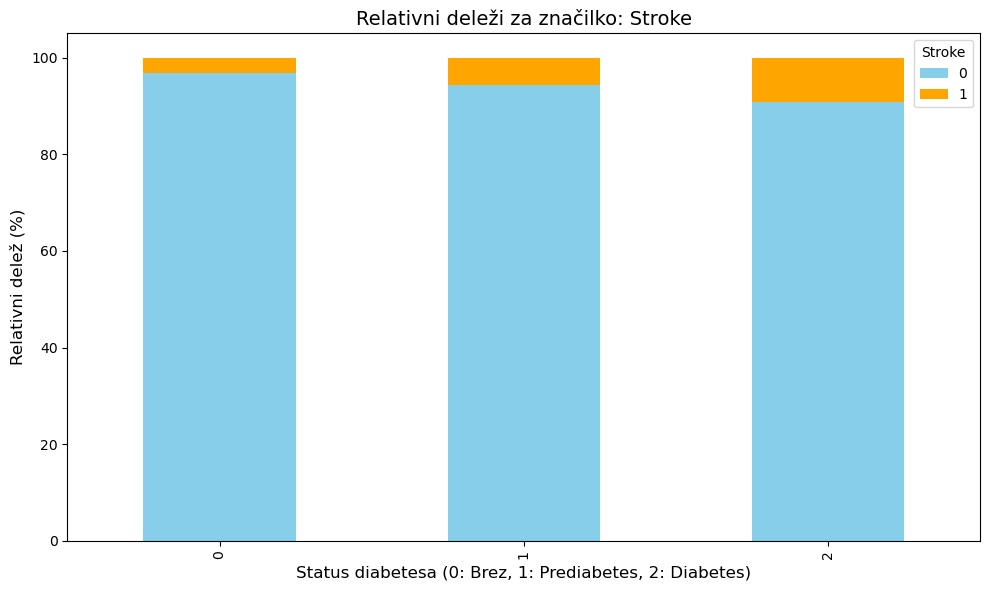

Relativni deleži za značilko **Stroke**:

Stroke,0,1
Diabetes_012,,
0,96.84,3.16
1,94.28,5.72
2,90.75,9.25


In [14]:
show_nominal_data('Stroke')

## HeartDiseaseorAttack grafi

Anketiranci, ki so kdaj poročali o koronarni srčni bolezni (CHD) ali miokardnem infarktu (MI)

-- nominalna spremenljivka

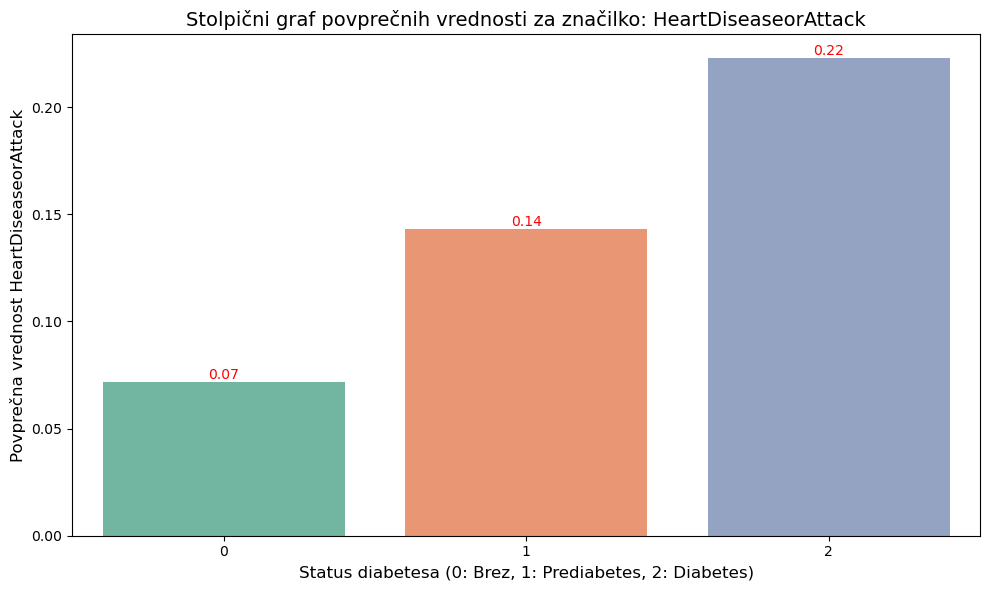

<Figure size 1000x600 with 0 Axes>

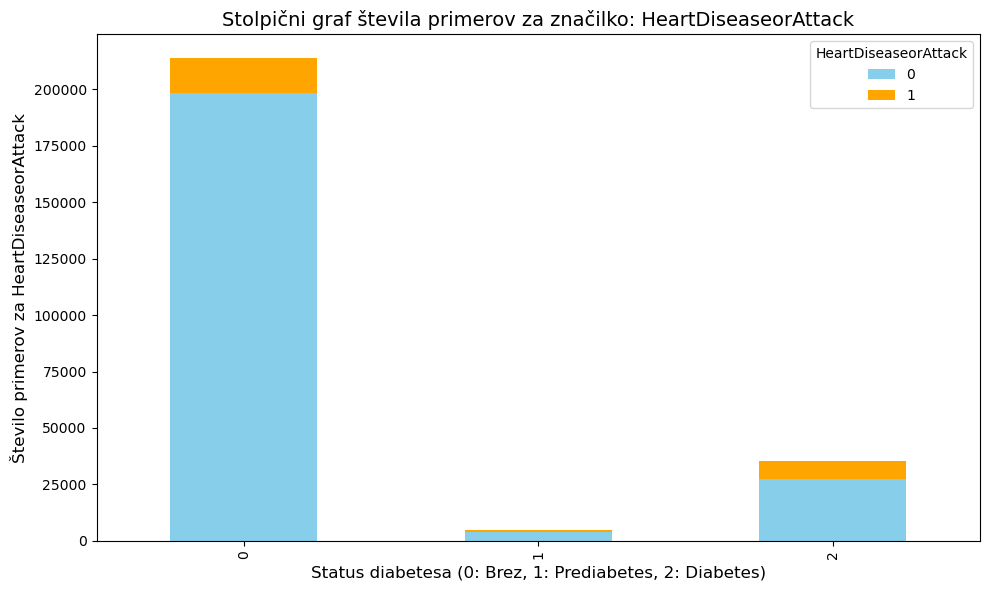

Število primerov za značilko **HeartDiseaseorAttack**

HeartDiseaseorAttack,0,1
Diabetes_012,,
0,198352,15351
1,3967,664
2,27468,7878


<Figure size 1000x600 with 0 Axes>

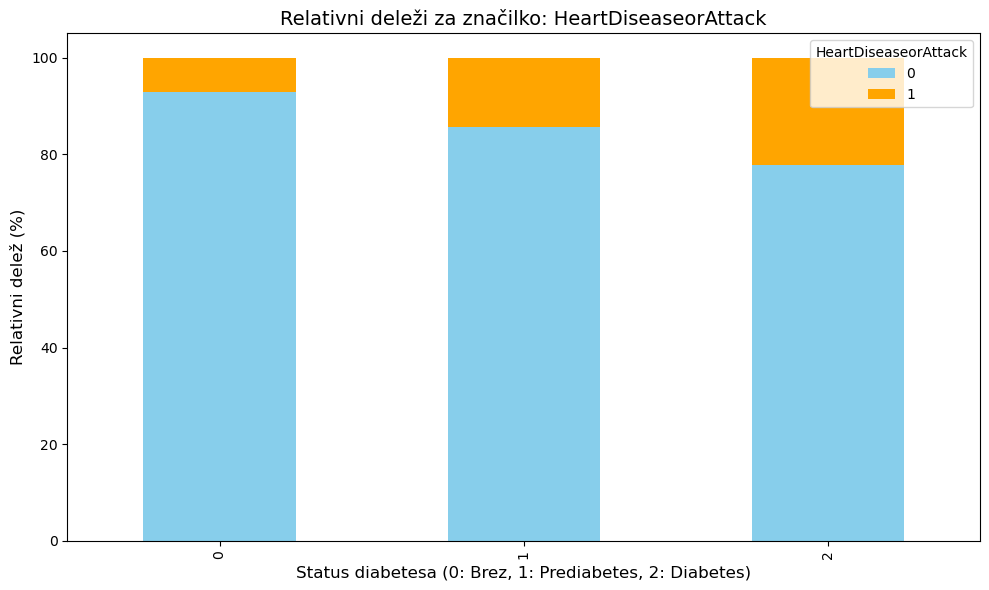

Relativni deleži za značilko **HeartDiseaseorAttack**:

HeartDiseaseorAttack,0,1
Diabetes_012,,
0,92.82,7.18
1,85.66,14.34
2,77.71,22.29


In [15]:
show_nominal_data('HeartDiseaseorAttack')

## PhysActivity grafi

Ali je anketiranec bil fizično aktiven/na v zadnjih 30 dneh razen v službi (DA/NE)

-- nominalna spremenljivka

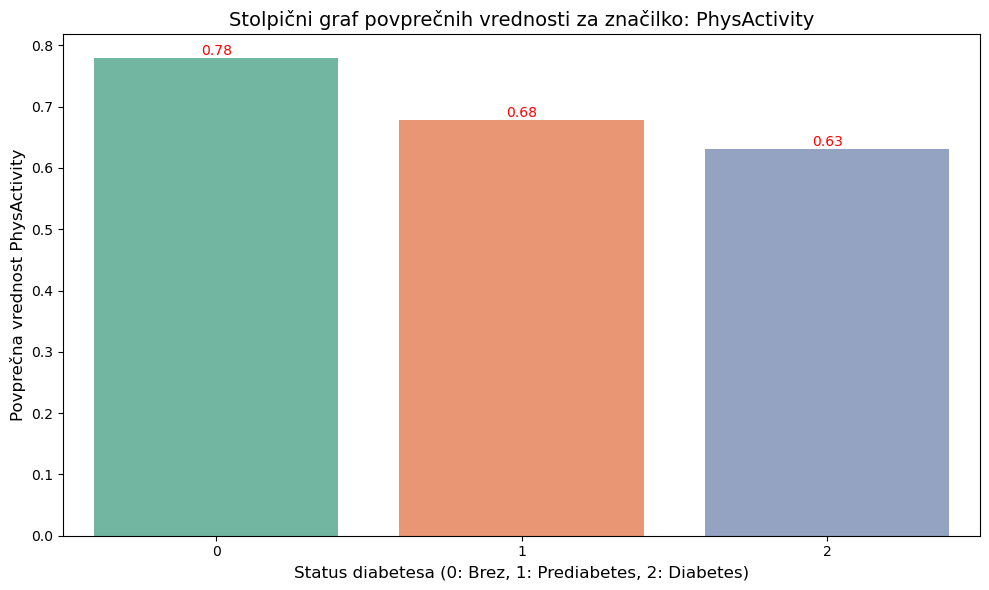

<Figure size 1000x600 with 0 Axes>

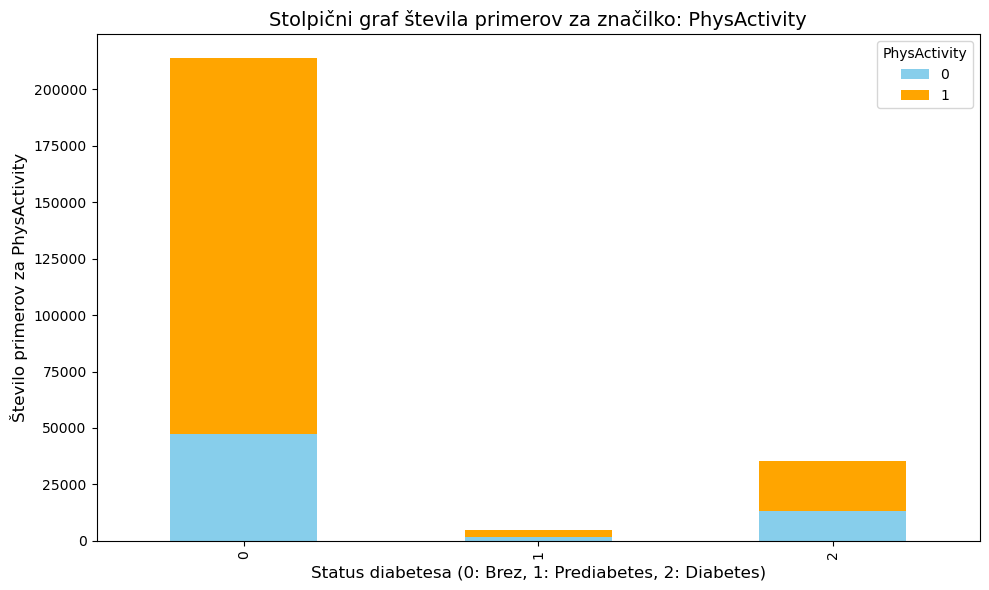

Število primerov za značilko **PhysActivity**

PhysActivity,0,1
Diabetes_012,,
0,47212,166491
1,1489,3142
2,13059,22287


<Figure size 1000x600 with 0 Axes>

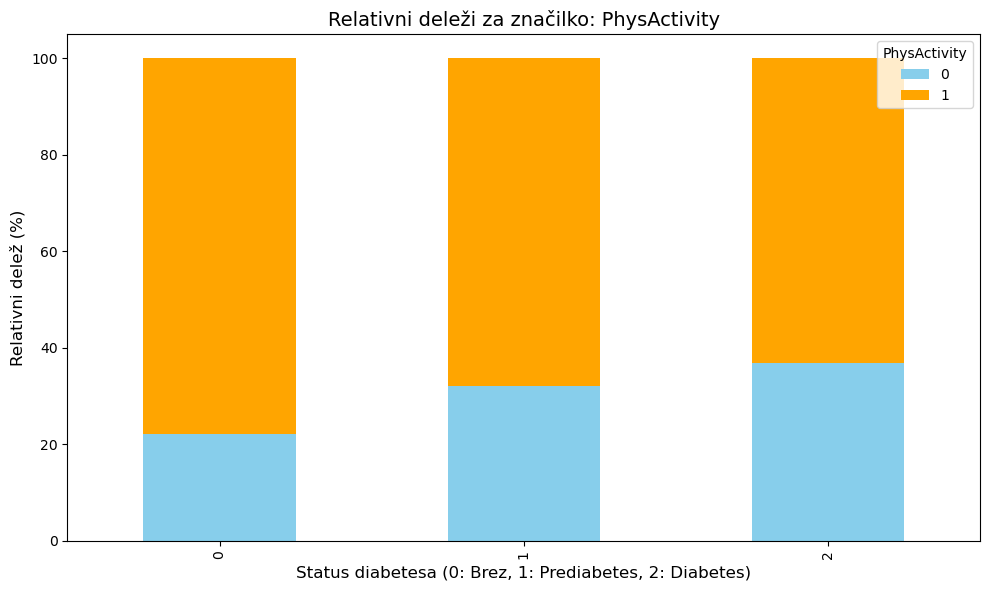

Relativni deleži za značilko **PhysActivity**:

PhysActivity,0,1
Diabetes_012,,
0,22.09,77.91
1,32.15,67.85
2,36.95,63.05


In [16]:
show_nominal_data('PhysActivity')

## Fruits grafi

Ali anketiranec poje 1 sadnje ali več na dan (DA/NE)

-- nominalna spremenljivka

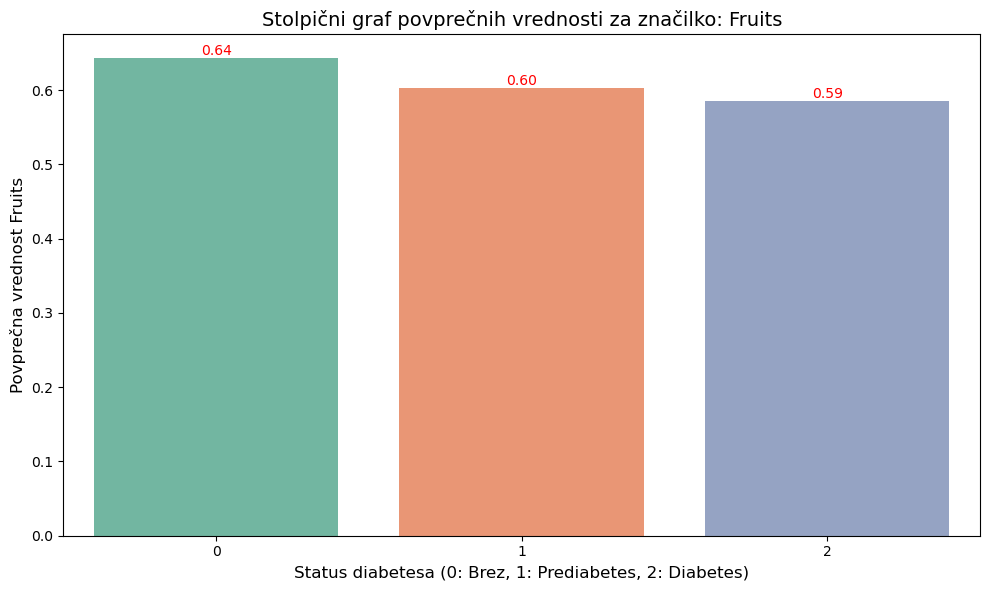

<Figure size 1000x600 with 0 Axes>

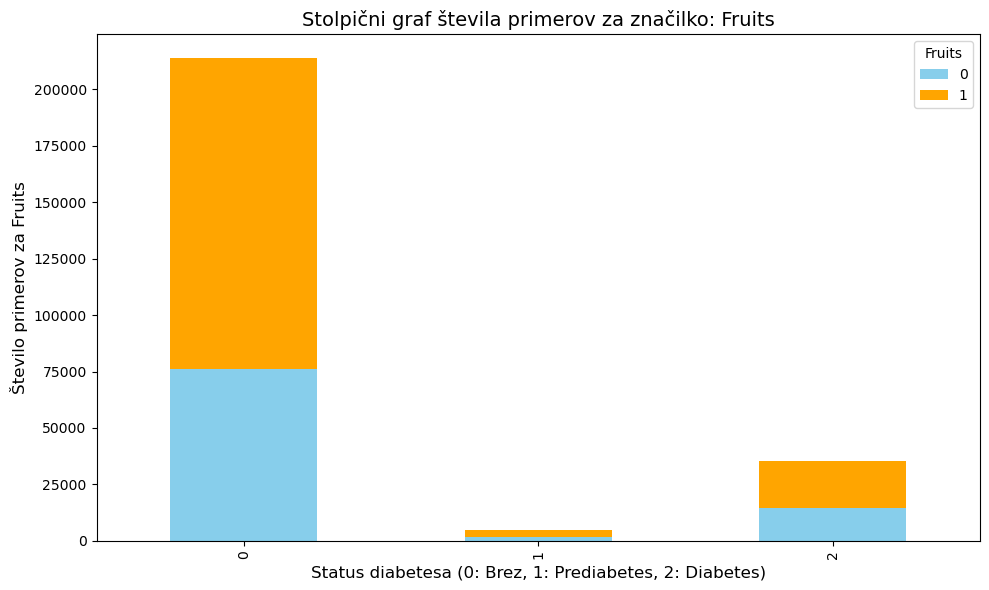

Število primerov za značilko **Fruits**

Fruits,0,1
Diabetes_012,,
0,76287,137416
1,1842,2789
2,14653,20693


<Figure size 1000x600 with 0 Axes>

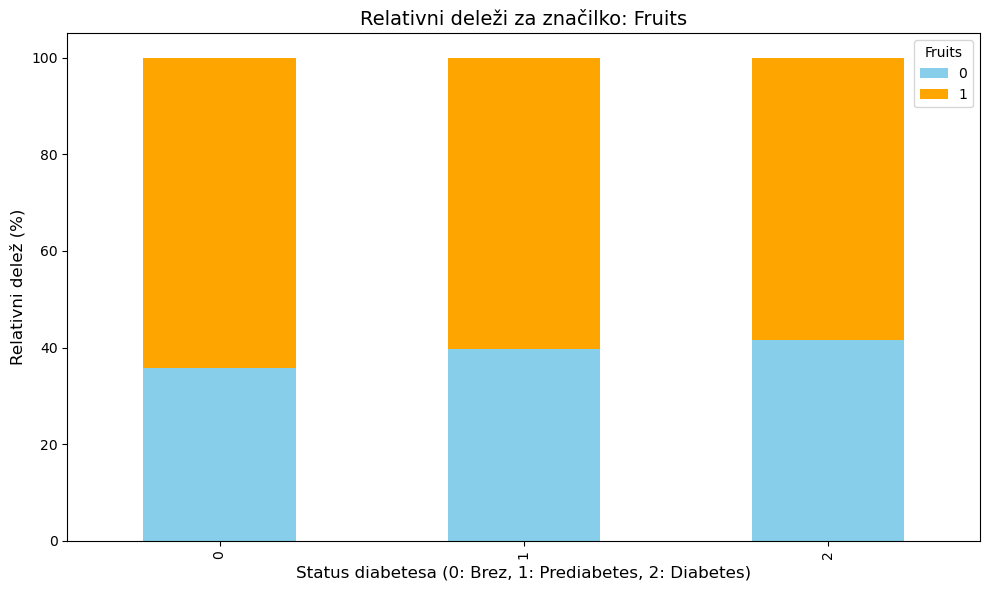

Relativni deleži za značilko **Fruits**:

Fruits,0,1
Diabetes_012,,
0,35.70,64.30
1,39.78,60.22
2,41.46,58.54


In [17]:
show_nominal_data('Fruits')

## Veggies grafi

Ali anketiranec je zelenjavo 1x ali večkrat dnevno (DA/NE)

-- nominalna spremenljivka

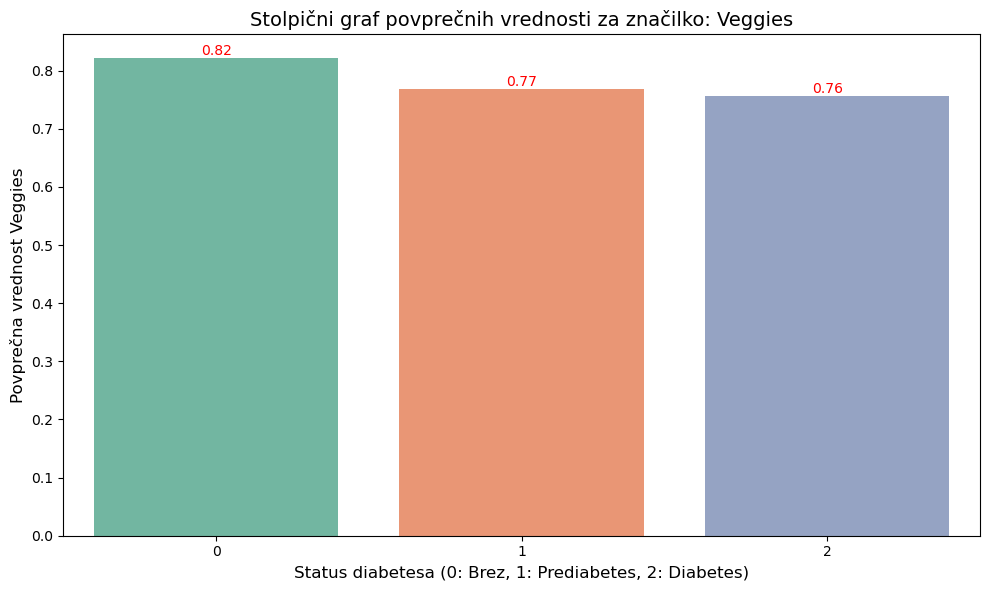

<Figure size 1000x600 with 0 Axes>

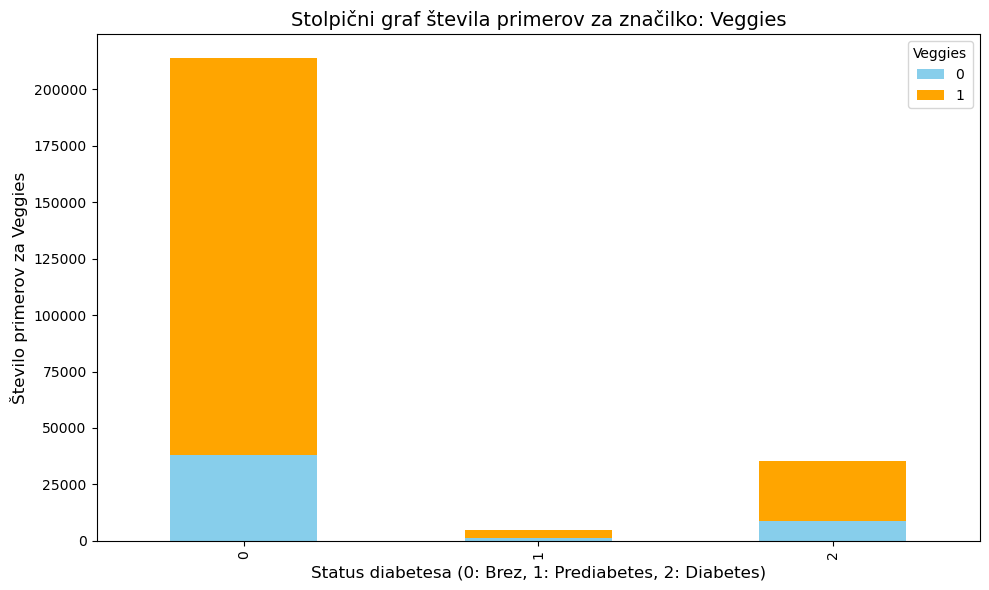

Število primerov za značilko **Veggies**

Veggies,0,1
Diabetes_012,,
0,38159,175544
1,1070,3561
2,8610,26736


<Figure size 1000x600 with 0 Axes>

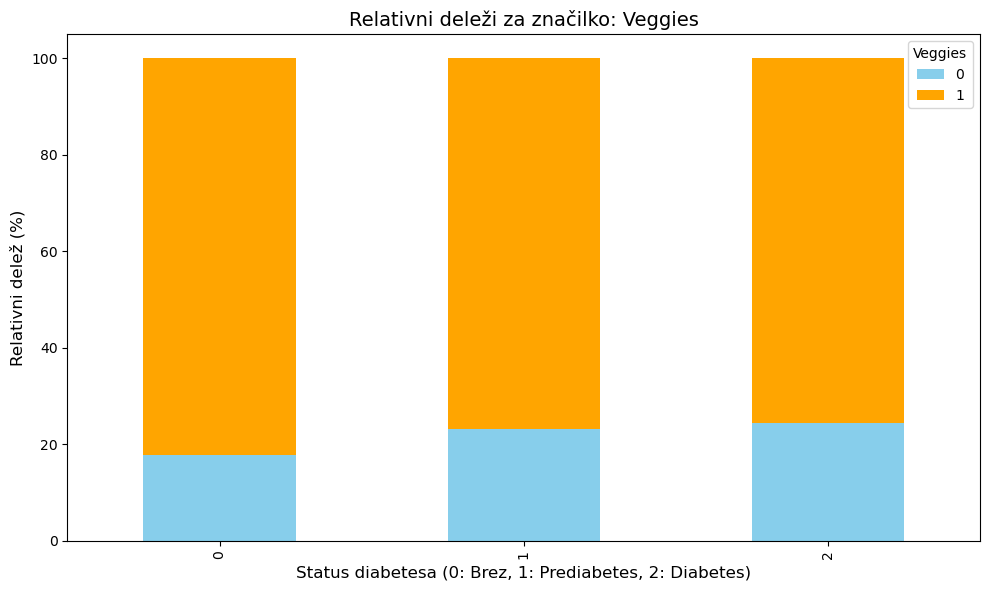

Relativni deleži za značilko **Veggies**:

Veggies,0,1
Diabetes_012,,
0,17.86,82.14
1,23.11,76.89
2,24.36,75.64


In [18]:
show_nominal_data('Veggies')

## HvyAlcoholConsump grafi

Prekomerni pivci (odrasli moški, ki popijejo več kot 14 pijač na teden, odrasle ženske pa več kot 7 pijač na teden)

-- nominalna spremenljivka

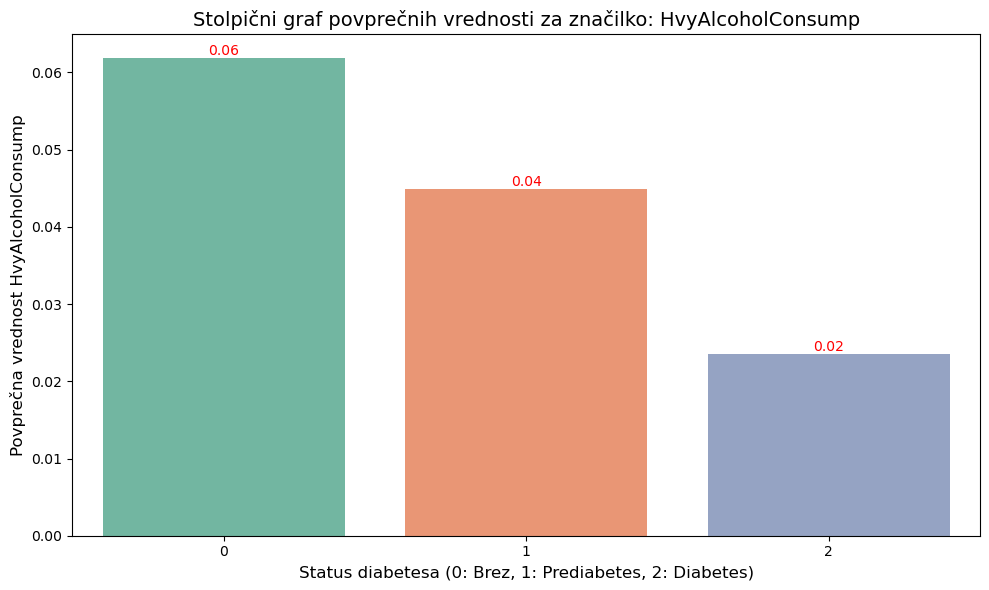

<Figure size 1000x600 with 0 Axes>

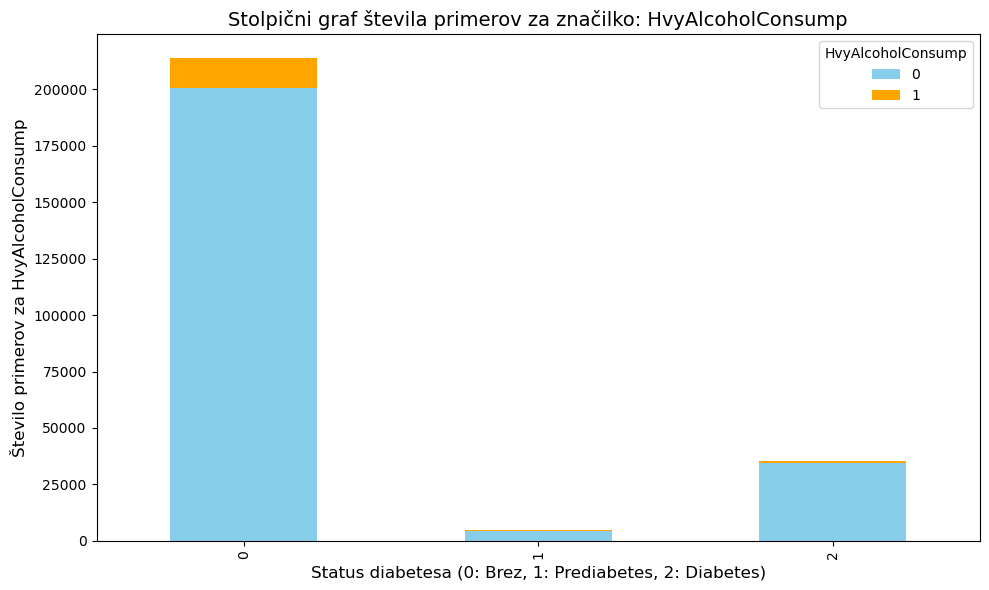

Število primerov za značilko **HvyAlcoholConsump**

HvyAlcoholConsump,0,1
Diabetes_012,,
0,200487,13216
1,4423,208
2,34514,832


<Figure size 1000x600 with 0 Axes>

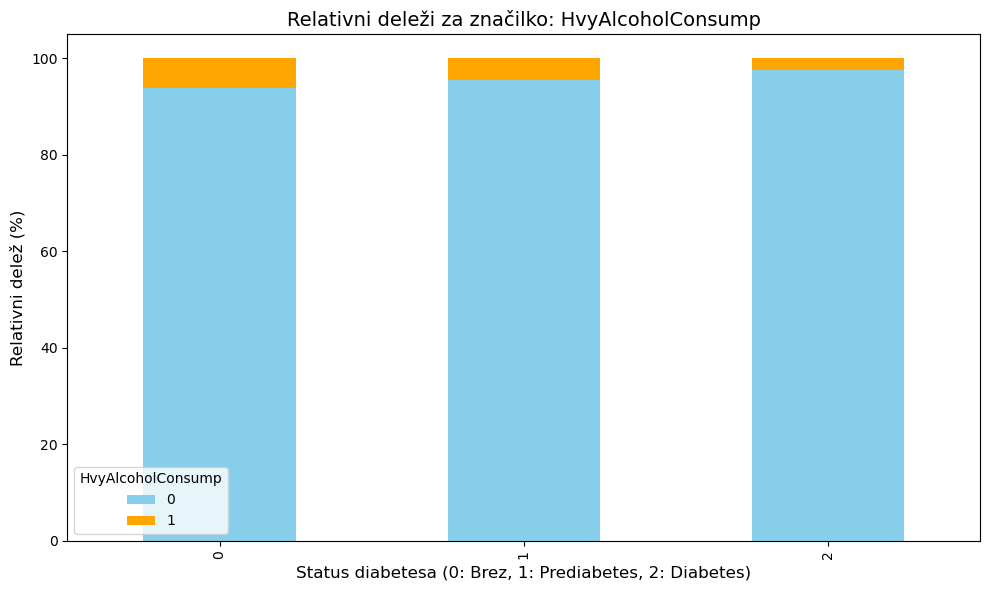

Relativni deleži za značilko **HvyAlcoholConsump**:

HvyAlcoholConsump,0,1
Diabetes_012,,
0,93.82,6.18
1,95.51,4.49
2,97.65,2.35


In [19]:
show_nominal_data('HvyAlcoholConsump')

## AnyHealthcare grafi

Ali ima anketiranec kakršno koli zdravstveno zavarovanje, vključno z zdravstvenim zavarovanjem, predplačniškimi načrti, kot so HMO, oz\
vladnih načrtov, kot sta Medicare ali indijska zdravstvena služba? (DA/NE)

-- nominalna spremenljivka

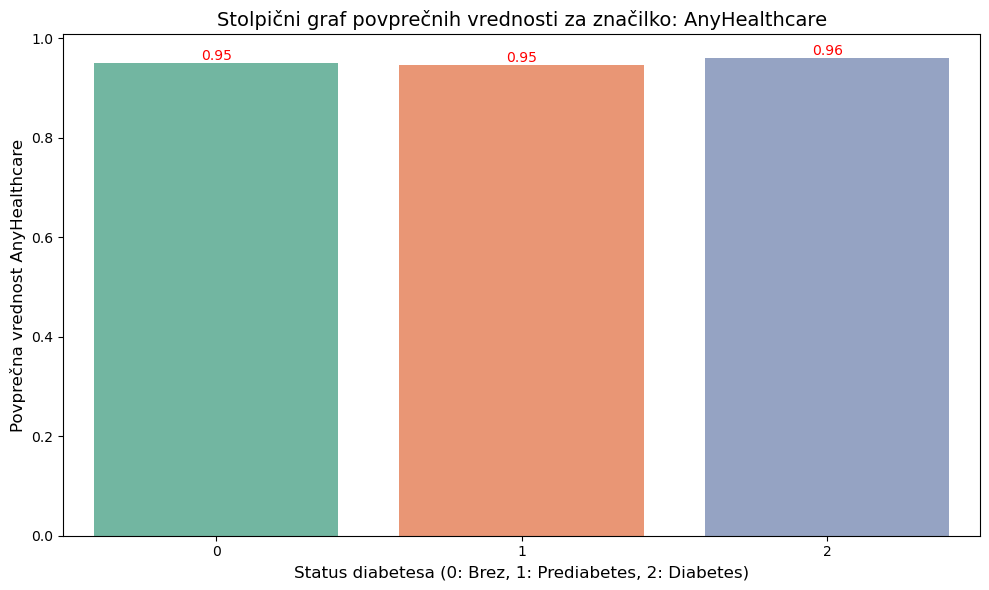

<Figure size 1000x600 with 0 Axes>

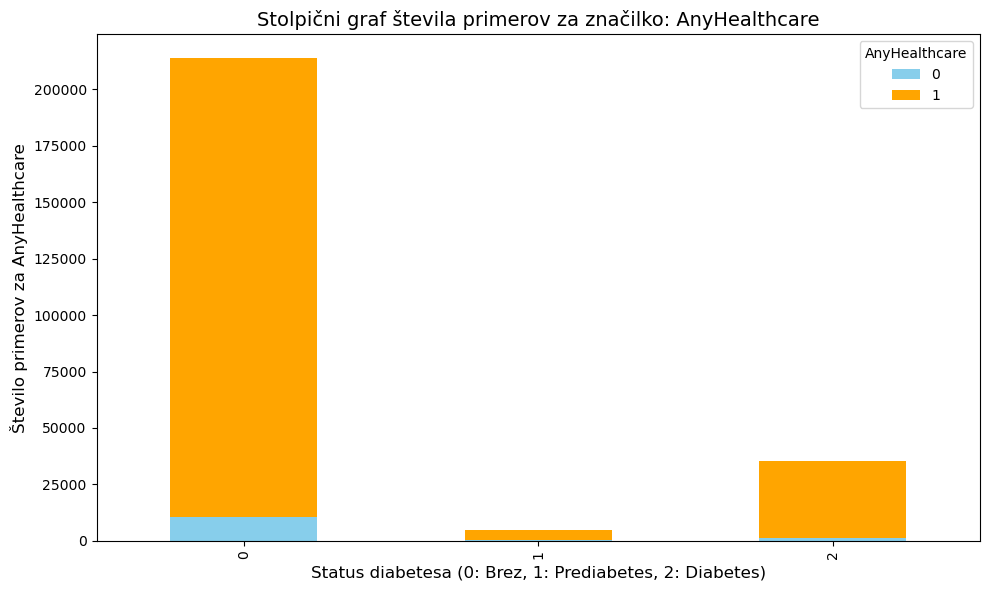

Število primerov za značilko **AnyHealthcare**

AnyHealthcare,0,1
Diabetes_012,,
0,10741,202962
1,254,4377
2,1422,33924


<Figure size 1000x600 with 0 Axes>

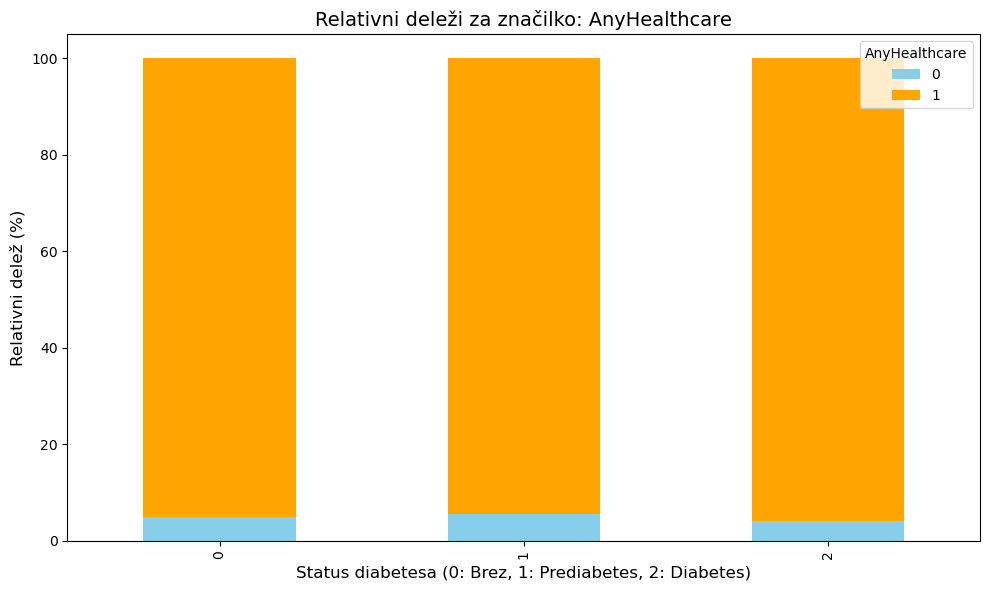

Relativni deleži za značilko **AnyHealthcare**:

AnyHealthcare,0,1
Diabetes_012,,
0,5.03,94.97
1,5.48,94.52
2,4.02,95.98


In [20]:
show_nominal_data('AnyHealthcare')

## NoDocbcCost grafi

Ali se anketiranec ni mogel udeležiti pregleda kdajkoli v zadnjem letu (12 mesecev), ker je cena prevelika (DA/NE)

-- nominalna spremenljivka

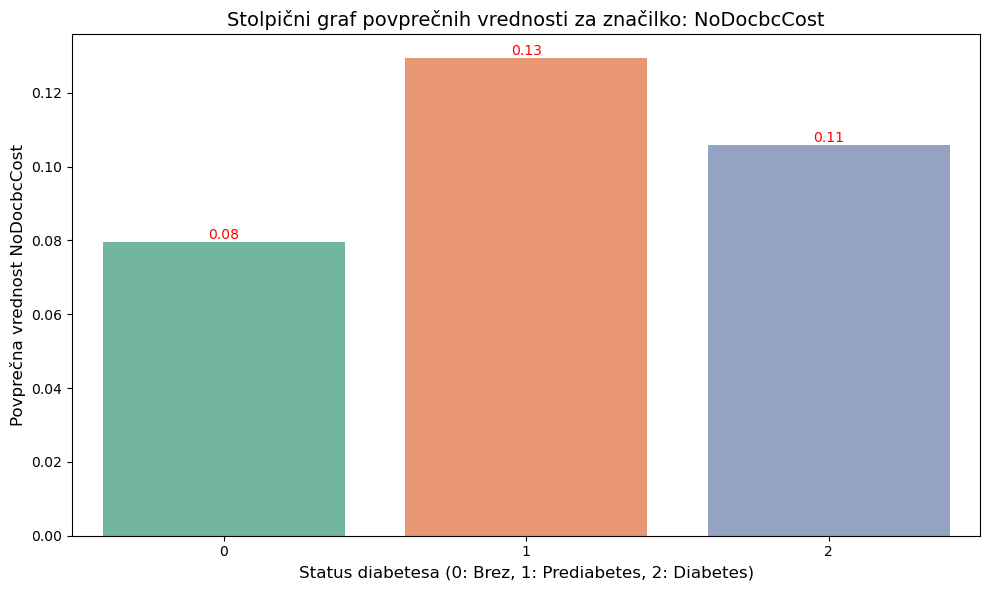

<Figure size 1000x600 with 0 Axes>

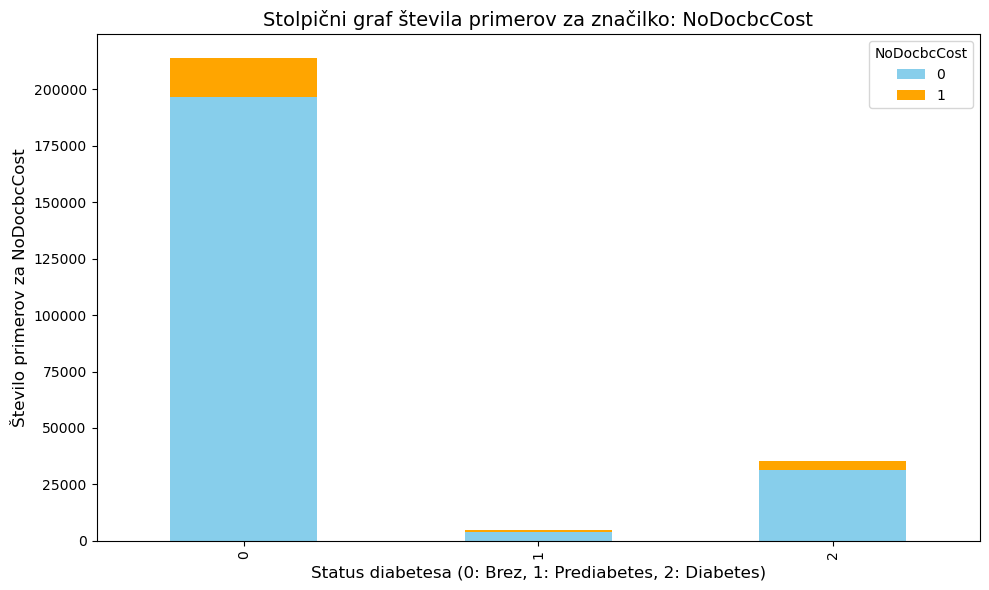

Število primerov za značilko **NoDocbcCost**

NoDocbcCost,0,1
Diabetes_012,,
0,196690,17013
1,4032,599
2,31604,3742


<Figure size 1000x600 with 0 Axes>

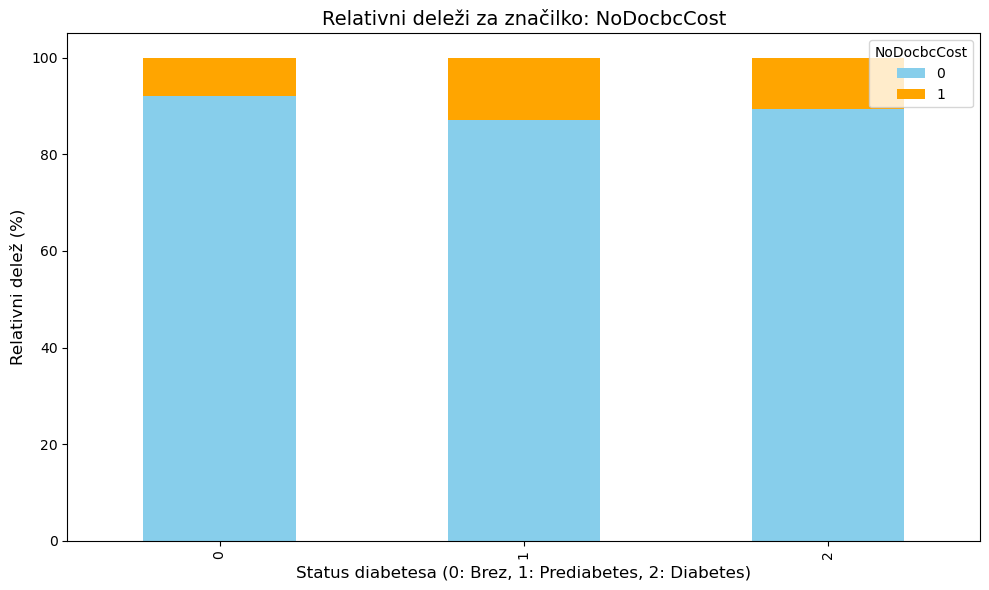

Relativni deleži za značilko **NoDocbcCost**:

NoDocbcCost,0,1
Diabetes_012,,
0,92.04,7.96
1,87.07,12.93
2,89.41,10.59


In [21]:
show_nominal_data('NoDocbcCost')

## GenHlth grafi

S kakšno stopnjo je anketiranec označil svoje zdravstveno stanje od 1 do 5, kjer:\
1 - Excellent (Odlično)\
2 - Very good (Zelo dobro)\
3 - Good (Dobro)\
4 - Fair (Zadovoljivo)\
5 - Poor (Slabo)

-- ordinalna spremenljivka

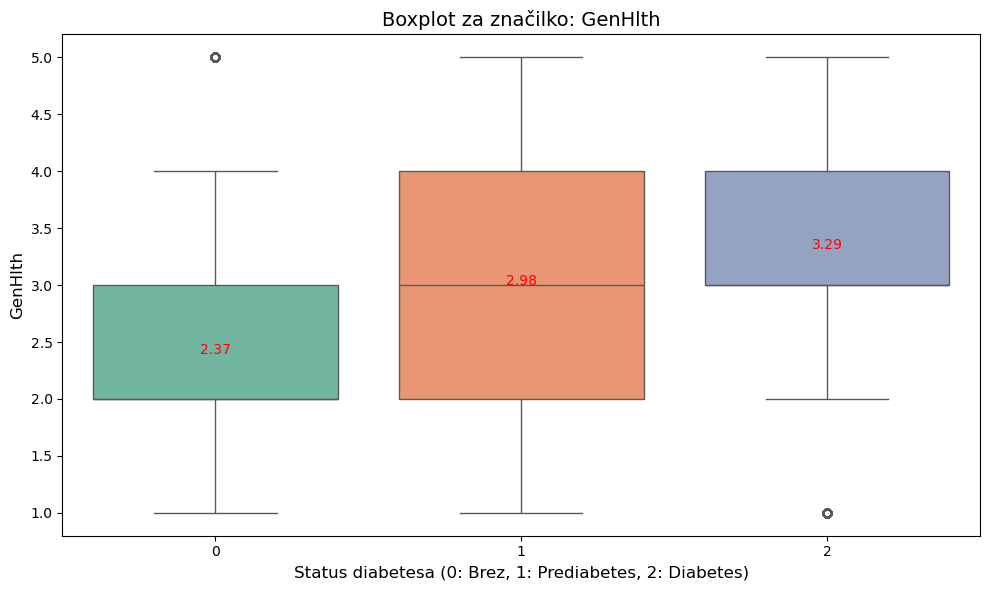

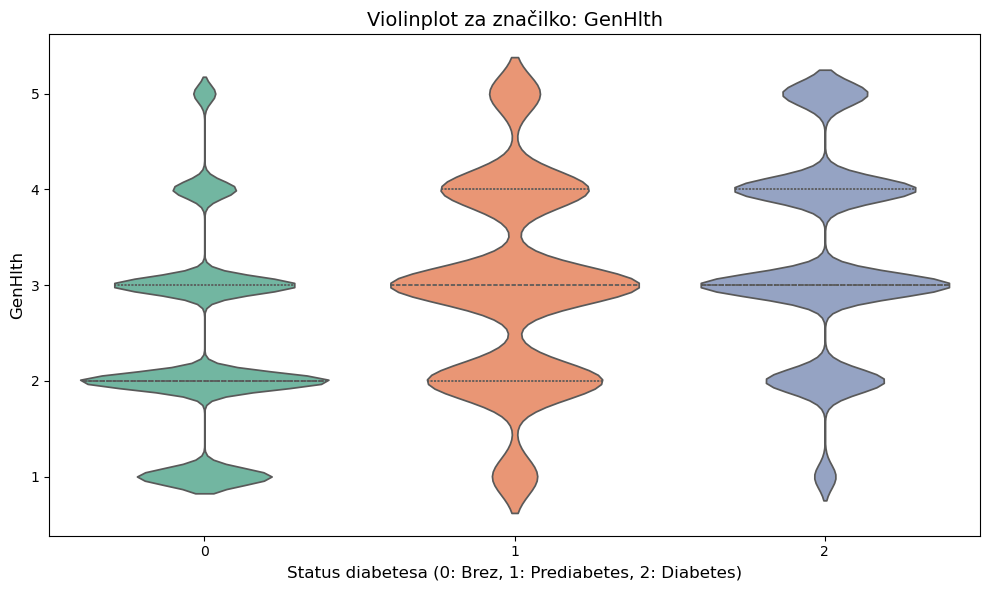

Število primerov za značilko **GenHlth**

GenHlth,1,2,3,4,5
Diabetes_012,,,,,
0,43846,81489,60461,20755,7152
1,313,1214,1728,1025,351
2,1140,6381,13457,9790,4578


Relativni deleži za značilko **GenHlth**:

GenHlth,1,2,3,4,5
Diabetes_012,,,,,
0,20.52,38.13,28.29,9.71,3.35
1,6.76,26.21,37.31,22.13,7.58
2,3.23,18.05,38.07,27.70,12.95


In [9]:
feature = 'GenHlth'

# Izris boxplota
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y=feature, data=data, palette="Set2", hue='Diabetes_012', legend=False)

# Dodajanje povprečne vrednosti na boxplot
mean_values = data.groupby('Diabetes_012')[feature].mean()
for i, mean in enumerate(mean_values):
    plt.text(i, mean, f'{mean:.2f}', color='red', ha='center', va='bottom', fontsize=10)

# Prilagoditev osi in naslovov
plt.title(f"Boxplot za značilko: {feature}", fontsize=14)
plt.xlabel("Status diabetesa (0: Brez, 1: Prediabetes, 2: Diabetes)", fontsize=12)
plt.ylabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

#alternativni prikaz podatkov
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes_012', y=feature, data=data, palette="Set2", inner="quartile", hue='Diabetes_012', legend=False)

# Naslovi in prilagoditve
plt.title(f"Violinplot za značilko: {feature}", fontsize=14)
plt.xlabel("Status diabetesa (0: Brez, 1: Prediabetes, 2: Diabetes)", fontsize=12)
plt.ylabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

#število primerov z vrednostjo 0 in 1 za vsako skupino
counts = data.groupby('Diabetes_012')[feature].value_counts().unstack(fill_value=0)
display(Markdown(f"Število primerov za značilko **{feature}**"))
display(counts)

#pregled relativnih deležev
relative_counts = counts.div(counts.sum(axis=1), axis=0)
display(Markdown(f"Relativni deleži za značilko **{feature}**:"))
display((relative_counts * 100).round(2))

## MentHlth grafi

Koliko dni v zadnjih 30 dneh je bilo anketirancu slabih glede mentalnega zdravja, ozirajoč na stres, depresijo in probleme z emocijami (1-30)

--kvantitativna spremenljivka

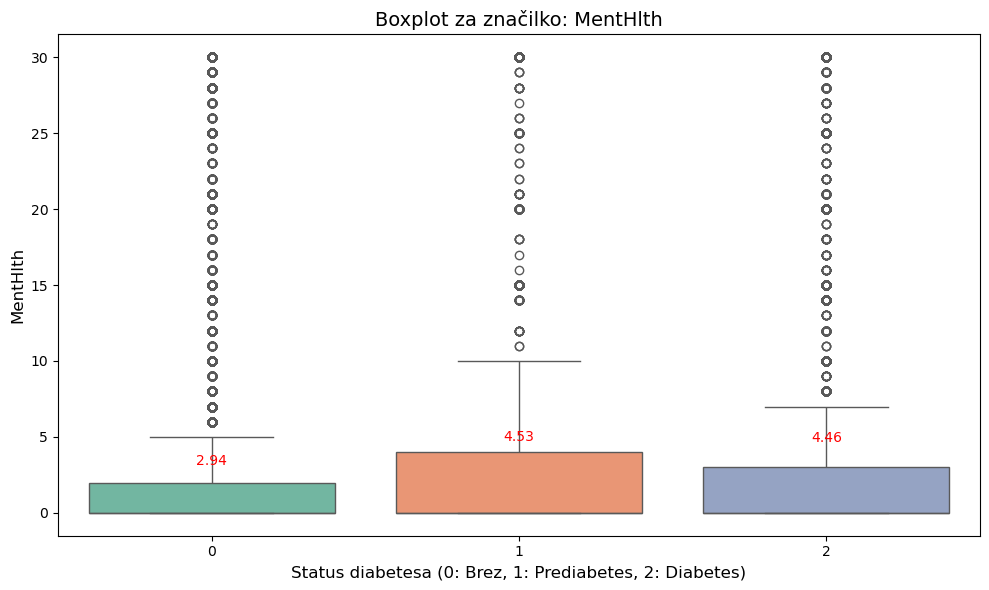

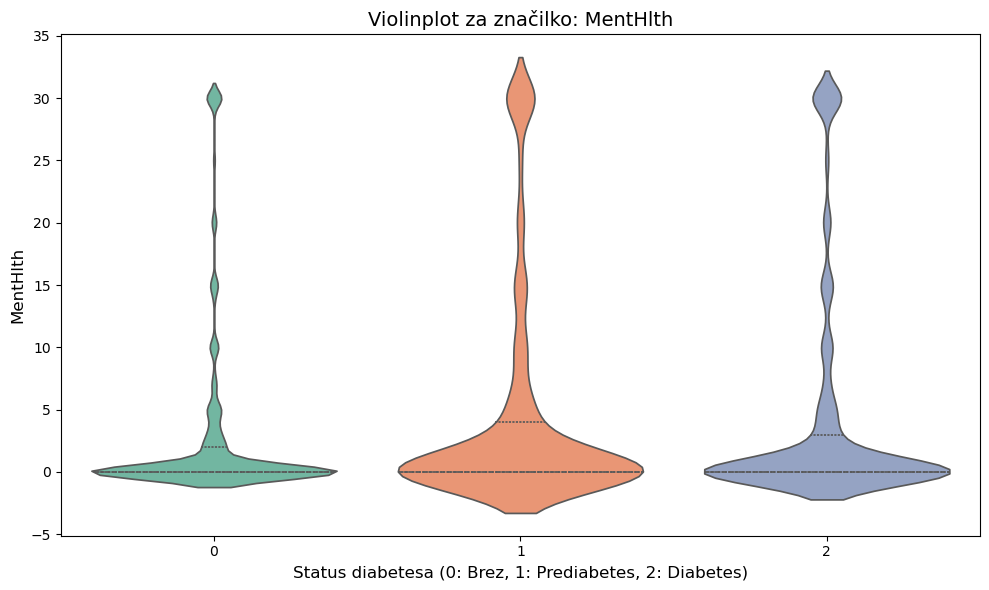

Število primerov za značilko **MentHlth**

MentHlth,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0,149321,7606,11315,6332,3217,7626,796,2632,516,69,...,170,50,28,25,882,35,66,263,125,8959
1,2956,120,231,125,83,181,28,63,13,9,...,9,2,2,2,33,3,1,7,3,361
2,23403,812,1508,924,489,1223,164,405,110,13,...,48,11,8,6,273,7,12,57,30,2768


Relativni deleži za značilko **MentHlth**:

MentHlth,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0,69.87,3.56,5.29,2.96,1.51,3.57,0.37,1.23,0.24,0.03,...,0.08,0.02,0.01,0.01,0.41,0.02,0.03,0.12,0.06,4.19
1,63.83,2.59,4.99,2.70,1.79,3.91,0.60,1.36,0.28,0.19,...,0.19,0.04,0.04,0.04,0.71,0.06,0.02,0.15,0.06,7.80
2,66.21,2.30,4.27,2.61,1.38,3.46,0.46,1.15,0.31,0.04,...,0.14,0.03,0.02,0.02,0.77,0.02,0.03,0.16,0.08,7.83


In [60]:
feature = 'MentHlth'

# Izris boxplota
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y=feature, data=data, palette="Set2", hue='Diabetes_012', legend=False)
# sns.stripplot(x='Diabetes_012', y=feature, data=data, color='black', alpha=0.5, jitter=True)

# Dodajanje povprečne vrednosti na boxplot
mean_values = data.groupby('Diabetes_012')[feature].mean()
for i, mean in enumerate(mean_values):
    plt.text(i, mean, f'{mean:.2f}', color='red', ha='center', va='bottom', fontsize=10)

# Prilagoditev osi in naslovov
plt.title(f"Boxplot za značilko: {feature}", fontsize=14)
plt.xlabel("Status diabetesa (0: Brez, 1: Prediabetes, 2: Diabetes)", fontsize=12)
plt.ylabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

#alternativni prikaz podatkov
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes_012', y=feature, data=data, palette="Set2", inner="quartile", hue='Diabetes_012', legend=False)
# sns.stripplot(x='Diabetes_012', y=feature, data=data, color='black', alpha=0.5, jitter=True)
# sns.swarmplot(x='Diabetes_012', y='HighBP', data=data, alpha=0.6)

# Naslovi in prilagoditve
plt.title(f"Violinplot za značilko: {feature}", fontsize=14)
plt.xlabel("Status diabetesa (0: Brez, 1: Prediabetes, 2: Diabetes)", fontsize=12)
plt.ylabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

#število primerov z vrednostjo 0 in 1 za vsako skupino
counts = data.groupby('Diabetes_012')[feature].value_counts().unstack(fill_value=0)
display(Markdown(f"Število primerov za značilko **{feature}**"))
display(counts)

#pregled relativnih deležev
relative_counts = counts.div(counts.sum(axis=1), axis=0)
display(Markdown(f"Relativni deleži za značilko **{feature}**:"))
display((relative_counts * 100).round(2))

## PhysHlth grafi

Koliko dni v zadnjih 30 dneh je bilo anketirancu slabih glede fizičnega zdravja, ozirajoč na fizične bolezni in poškodbe (1-30)

--kvantitativna spremenljivka

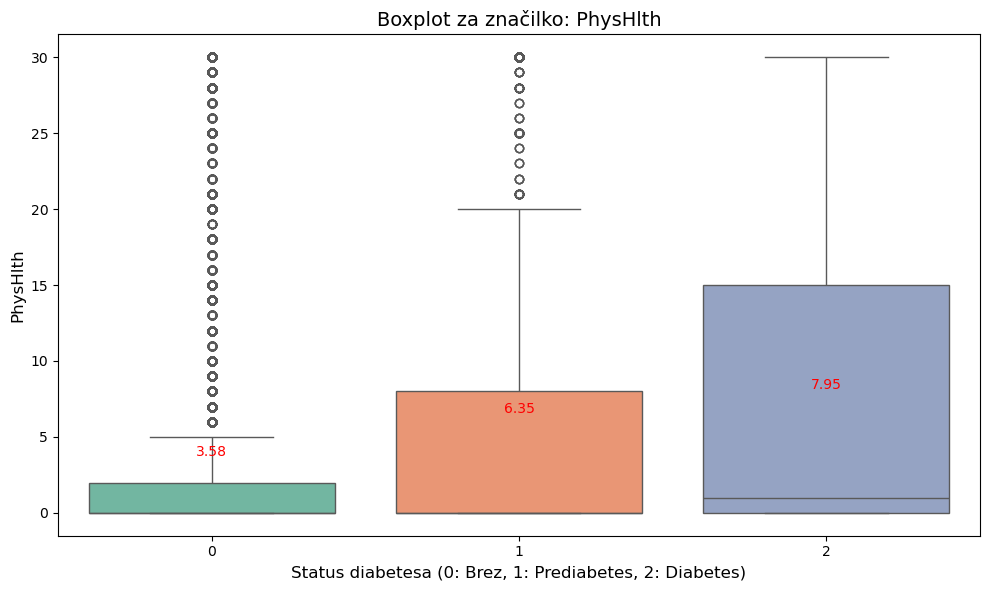

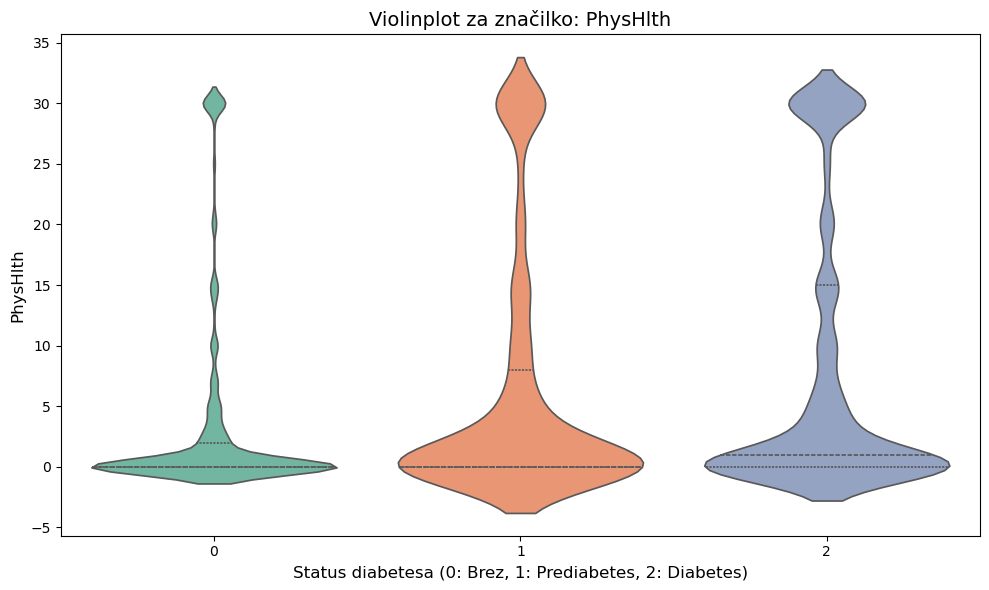

Število primerov za značilko **PhysHlth**

PhysHlth,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0,140841,10026,12488,7033,3681,6140,1010,3705,629,138,...,506,43,37,54,906,43,75,363,134,13116
1,2471,174,248,173,98,168,38,90,21,5,...,18,4,3,3,36,4,3,16,7,558
2,16740,1188,2028,1289,763,1314,282,743,159,36,...,139,23,16,15,394,22,21,143,74,5726


Relativni deleži za značilko **PhysHlth**:

PhysHlth,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0,65.91,4.69,5.84,3.29,1.72,2.87,0.47,1.73,0.29,0.06,...,0.24,0.02,0.02,0.03,0.42,0.02,0.04,0.17,0.06,6.14
1,53.36,3.76,5.36,3.74,2.12,3.63,0.82,1.94,0.45,0.11,...,0.39,0.09,0.06,0.06,0.78,0.09,0.06,0.35,0.15,12.05
2,47.36,3.36,5.74,3.65,2.16,3.72,0.80,2.10,0.45,0.10,...,0.39,0.07,0.05,0.04,1.11,0.06,0.06,0.40,0.21,16.20


In [61]:
feature = 'PhysHlth'

# Izris boxplota
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y=feature, data=data, palette="Set2", hue='Diabetes_012', legend=False)
# sns.stripplot(x='Diabetes_012', y=feature, data=data, color='black', alpha=0.5, jitter=True)

# Dodajanje povprečne vrednosti na boxplot
mean_values = data.groupby('Diabetes_012')[feature].mean()
for i, mean in enumerate(mean_values):
    plt.text(i, mean, f'{mean:.2f}', color='red', ha='center', va='bottom', fontsize=10)

# Prilagoditev osi in naslovov
plt.title(f"Boxplot za značilko: {feature}", fontsize=14)
plt.xlabel("Status diabetesa (0: Brez, 1: Prediabetes, 2: Diabetes)", fontsize=12)
plt.ylabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

#alternativni prikaz podatkov
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes_012', y=feature, data=data, palette="Set2", inner="quartile", hue='Diabetes_012', legend=False)
# sns.stripplot(x='Diabetes_012', y=feature, data=data, color='black', alpha=0.5, jitter=True)
# sns.swarmplot(x='Diabetes_012', y='HighBP', data=data, alpha=0.6)

# Naslovi in prilagoditve
plt.title(f"Violinplot za značilko: {feature}", fontsize=14)
plt.xlabel("Status diabetesa (0: Brez, 1: Prediabetes, 2: Diabetes)", fontsize=12)
plt.ylabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

#število primerov z vrednostjo 0 in 1 za vsako skupino
counts = data.groupby('Diabetes_012')[feature].value_counts().unstack(fill_value=0)
display(Markdown(f"Število primerov za značilko **{feature}**"))
display(counts)

#pregled relativnih deležev
relative_counts = counts.div(counts.sum(axis=1), axis=0)
display(Markdown(f"Relativni deleži za značilko **{feature}**:"))
display((relative_counts * 100).round(2))

## DiffWalk grafi

Ali je imel/ima anketiranec probleme s hojo (DA/NE)

--nominalna spremenljivka

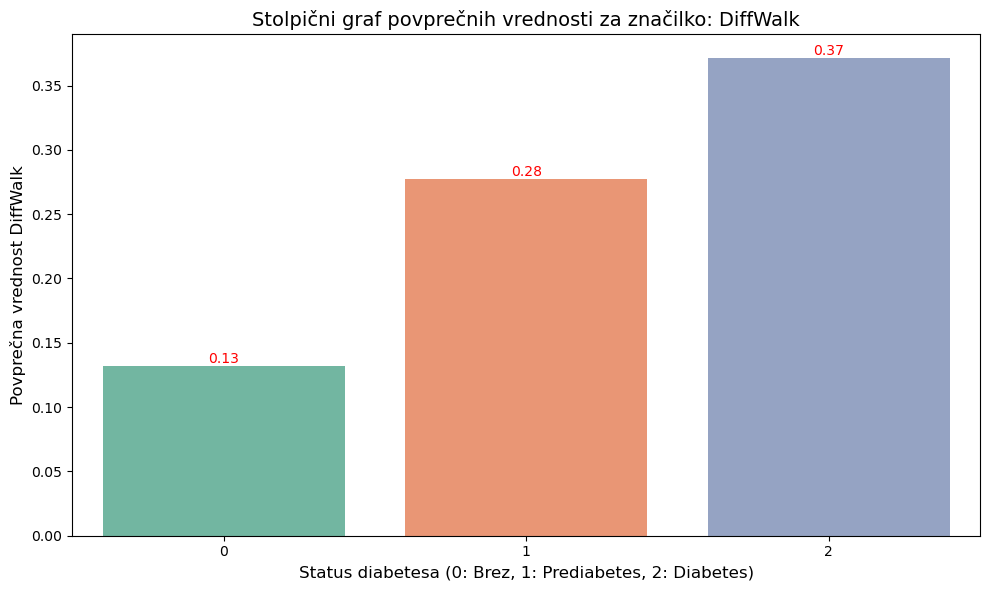

<Figure size 1000x600 with 0 Axes>

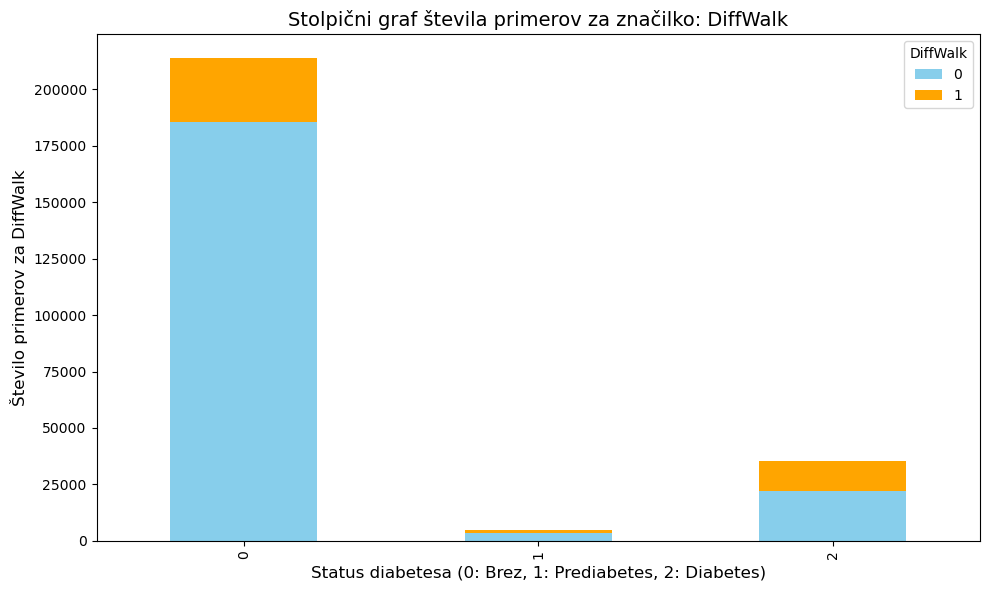

Število primerov za značilko **DiffWalk**

DiffWalk,0,1
Diabetes_012,,
0,185434,28269
1,3346,1285
2,22225,13121


<Figure size 1000x600 with 0 Axes>

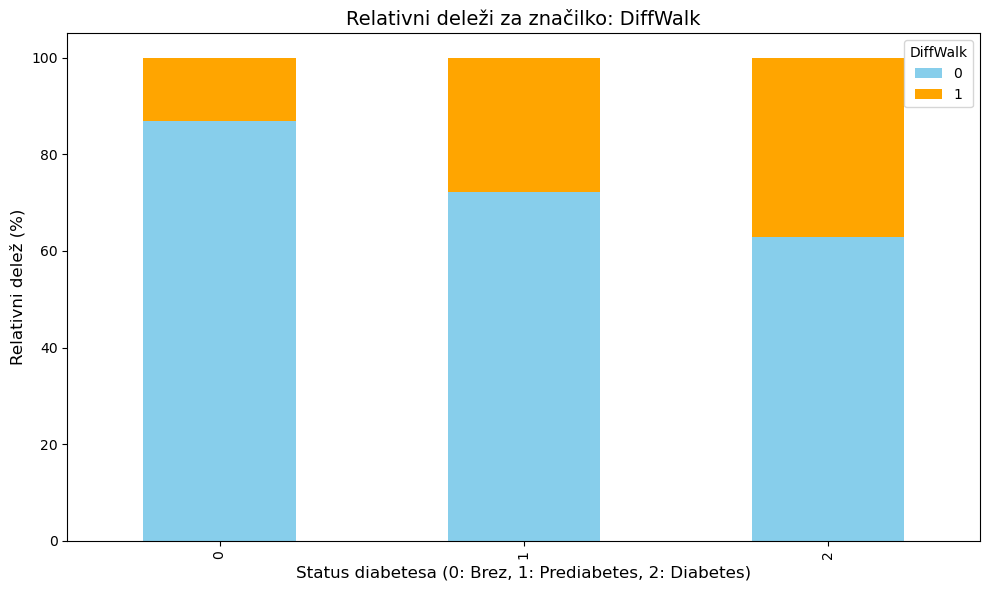

Relativni deleži za značilko **DiffWalk**:

DiffWalk,0,1
Diabetes_012,,
0,86.77,13.23
1,72.25,27.75
2,62.88,37.12


In [22]:
show_nominal_data('DiffWalk')

## Sex (spol) grafi

Katerega spola je anketiranec\
ženska - 0\
moški - 1

--nominalna spremenljivka

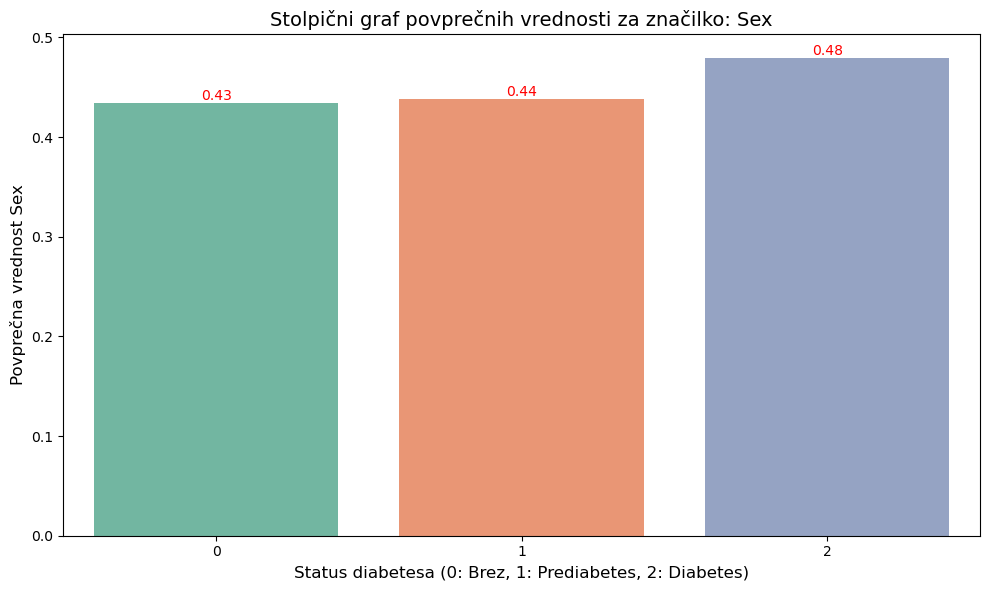

<Figure size 1000x600 with 0 Axes>

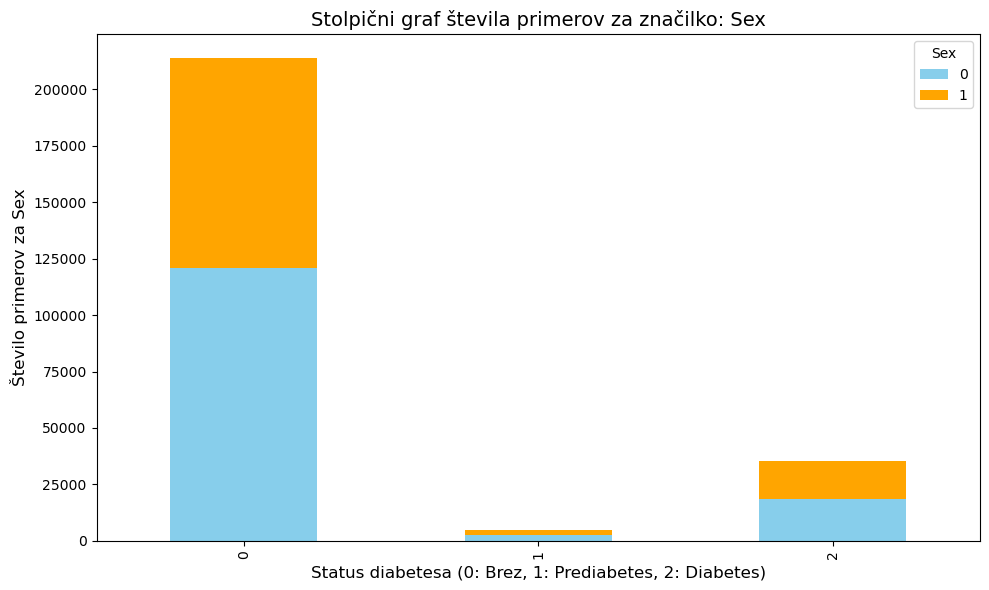

Število primerov za značilko **Sex**

Sex,0,1
Diabetes_012,,
0,120959,92744
1,2604,2027
2,18411,16935


<Figure size 1000x600 with 0 Axes>

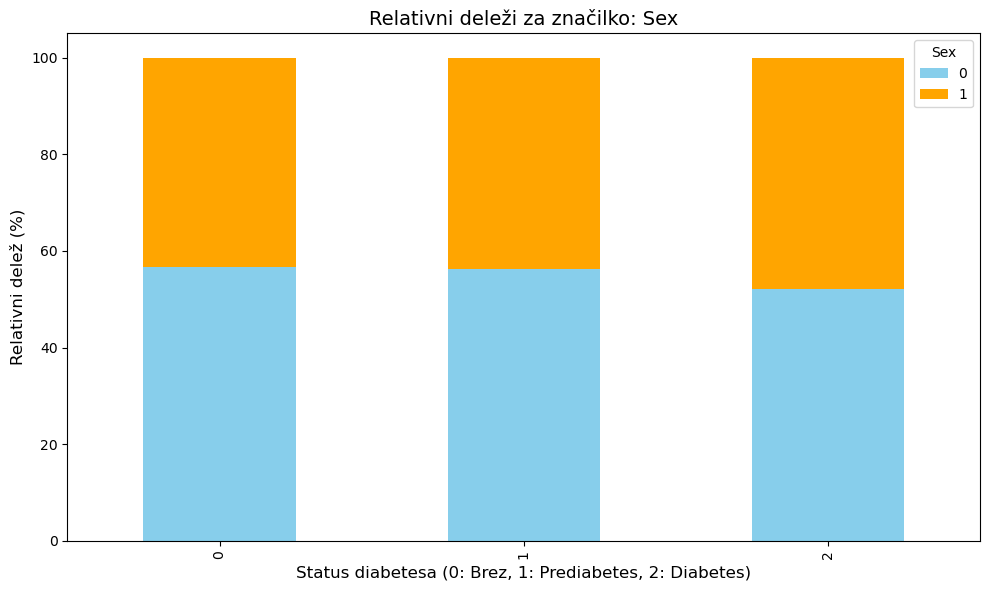

Relativni deleži za značilko **Sex**:

Sex,0,1
Diabetes_012,,
0,56.60,43.40
1,56.23,43.77
2,52.09,47.91


In [23]:
show_nominal_data('Sex')

## Age grafi

Ta značilka ima 13 nivojev, kjer:\
1 --> 18 <= AGE <= 24\
2 --> 25 <= AGE <= 29\
3 --> 30 <= AGE <= 34\
4 --> 35 <= AGE <= 39\
5 --> 40 <= AGE <= 44\
6 --> 45 <= AGE <= 49\
7 --> 50 <= AGE <= 54\
8 --> 55 <= AGE <= 59\
9 --> 60 <= AGE <= 64\
10 -> 65 <= AGE <= 69\
11 -> 70 <= AGE <= 74\
12 -> 75 <= AGE <= 79\
13 -> 80 <= AGE <= 99

--ordinalna spremenljivka

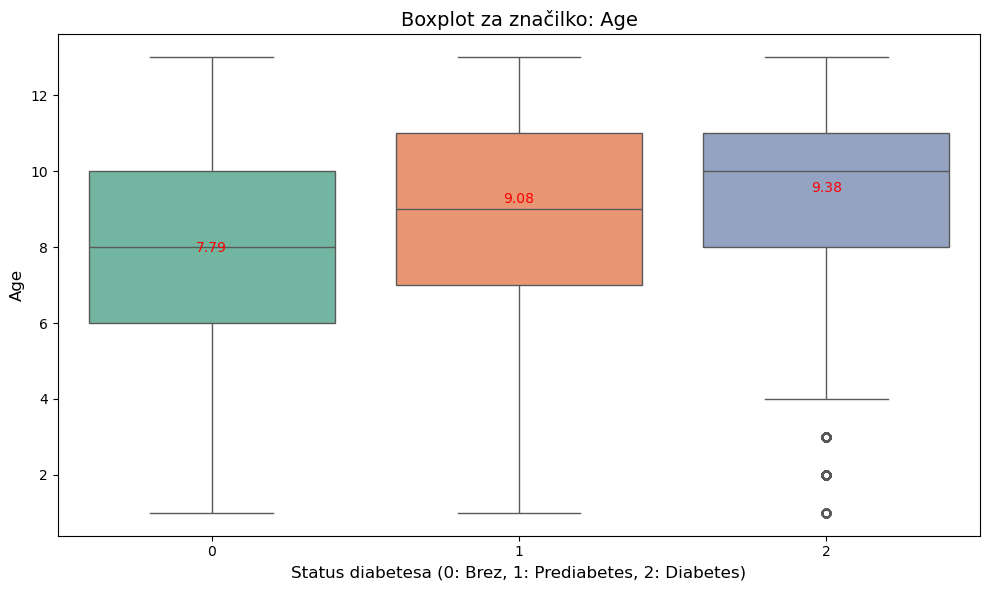

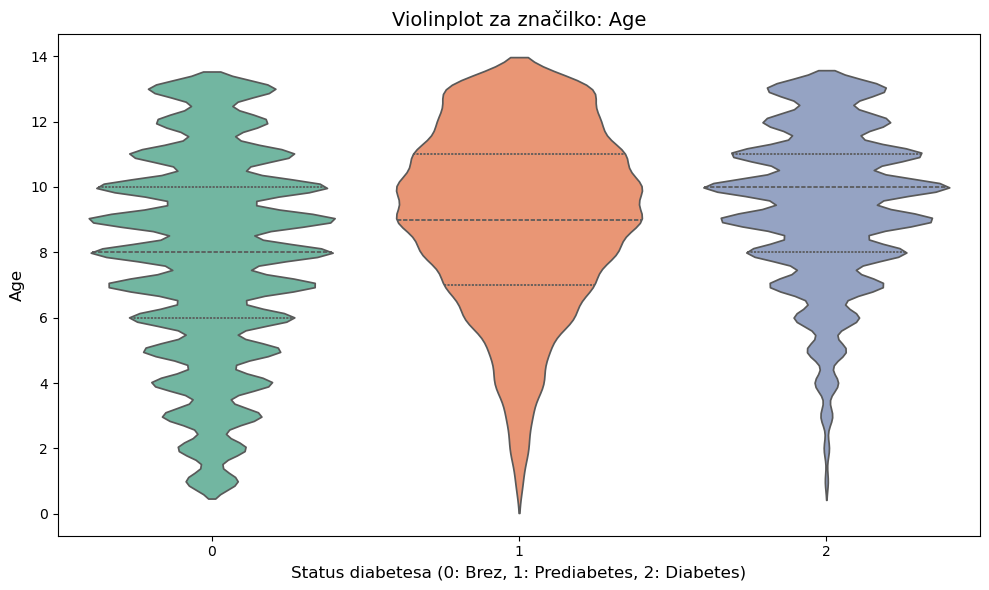

Število primerov za značilko **Age**

Age,1,2,3,4,5,6,7,8,9,10,11,12,13
Diabetes_012,,,,,,,,,,,,,
0,5601,7404,10737,13055,14943,17765,22808,26019,26809,24939,17790,12132,13701
1,21,54,72,142,163,312,418,550,702,697,602,445,453
2,78,140,314,626,1051,1742,3088,4263,5733,6558,5141,3403,3209


Relativni deleži za značilko **Age**:

Age,1,2,3,4,5,6,7,8,9,10,11,12,13
Diabetes_012,,,,,,,,,,,,,
0,2.62,3.46,5.02,6.11,6.99,8.31,10.67,12.18,12.54,11.67,8.32,5.68,6.41
1,0.45,1.17,1.55,3.07,3.52,6.74,9.03,11.88,15.16,15.05,13.00,9.61,9.78
2,0.22,0.40,0.89,1.77,2.97,4.93,8.74,12.06,16.22,18.55,14.54,9.63,9.08


In [64]:
feature = 'Age'

# Izris boxplota
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y=feature, data=data, palette="Set2", hue='Diabetes_012', legend=False)
# sns.stripplot(x='Diabetes_012', y=feature, data=data, color='black', alpha=0.5, jitter=True)

# Dodajanje povprečne vrednosti na boxplot
mean_values = data.groupby('Diabetes_012')[feature].mean()
for i, mean in enumerate(mean_values):
    plt.text(i, mean, f'{mean:.2f}', color='red', ha='center', va='bottom', fontsize=10)

# Prilagoditev osi in naslovov
plt.title(f"Boxplot za značilko: {feature}", fontsize=14)
plt.xlabel("Status diabetesa (0: Brez, 1: Prediabetes, 2: Diabetes)", fontsize=12)
plt.ylabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

#alternativni prikaz podatkov
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes_012', y=feature, data=data, palette="Set2", inner="quartile", hue='Diabetes_012', legend=False)
# sns.stripplot(x='Diabetes_012', y=feature, data=data, color='black', alpha=0.5, jitter=True)
# sns.swarmplot(x='Diabetes_012', y='HighBP', data=data, alpha=0.6)

# Naslovi in prilagoditve
plt.title(f"Violinplot za značilko: {feature}", fontsize=14)
plt.xlabel("Status diabetesa (0: Brez, 1: Prediabetes, 2: Diabetes)", fontsize=12)
plt.ylabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

#število primerov z vrednostjo 0 in 1 za vsako skupino
counts = data.groupby('Diabetes_012')[feature].value_counts().unstack(fill_value=0)
display(Markdown(f"Število primerov za značilko **{feature}**"))
display(counts)

#pregled relativnih deležev
relative_counts = counts.div(counts.sum(axis=1), axis=0)
display(Markdown(f"Relativni deleži za značilko **{feature}**:"))
display((relative_counts * 100).round(2))

## Education grafi

To je 6 nivojska značilka, ki odraža anketirancev dosežen nivo izobrazbe, kjer:\
1 -> Nikoli ni hodil v šolo ali pa bil samo v vrtcu\
2 -> Od 1. do 8. razreda (osnovno)\
3 -> Od 9. do 11. razreda (nekaj srednje šole)\
4 -> 12. razred ali GED (srednješolski maturant)\
5 -> Fakulteta od 1 do 3 let (nekaj faksa ali tehnične šole)\
6 -> Visoka šola 4 ali več let (višja diploma)

--ordinalna spremenljivka

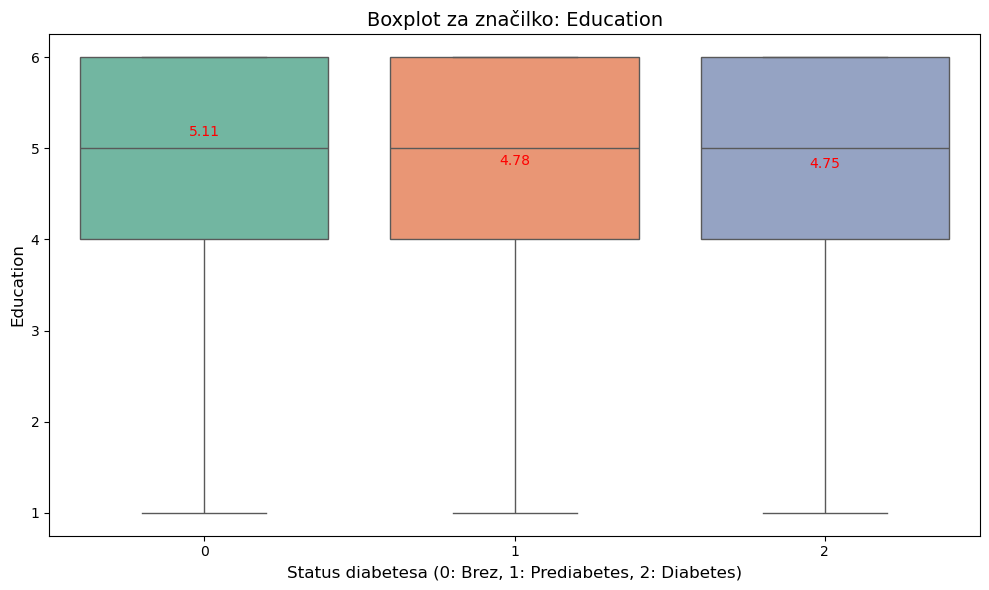

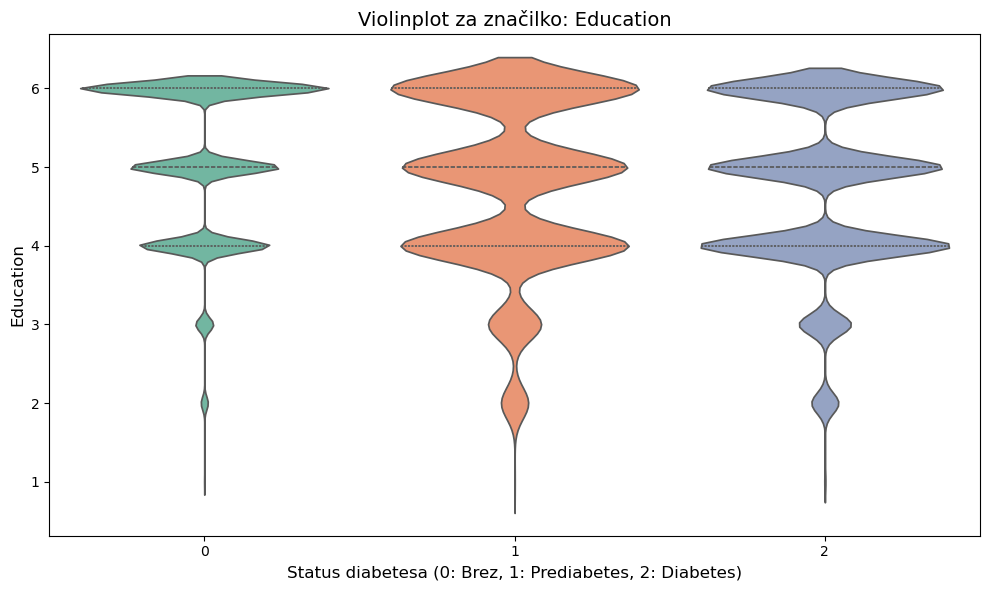

Število primerov za značilko **Education**

Education,1,2,3,4,5,6
Diabetes_012,,,,,,
0,125,2699,6868,50334,58223,95454
1,2,161,314,1350,1333,1471
2,47,1183,2296,11066,10354,10400


Relativni deleži za značilko **Education**:

Education,1,2,3,4,5,6
Diabetes_012,,,,,,
0,0.06,1.26,3.21,23.55,27.24,44.67
1,0.04,3.48,6.78,29.15,28.78,31.76
2,0.13,3.35,6.50,31.31,29.29,29.42


In [65]:
feature = 'Education'

# Izris boxplota
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y=feature, data=data, palette="Set2", hue='Diabetes_012', legend=False)
# sns.stripplot(x='Diabetes_012', y=feature, data=data, color='black', alpha=0.5, jitter=True)

# Dodajanje povprečne vrednosti na boxplot
mean_values = data.groupby('Diabetes_012')[feature].mean()
for i, mean in enumerate(mean_values):
    plt.text(i, mean, f'{mean:.2f}', color='red', ha='center', va='bottom', fontsize=10)

# Prilagoditev osi in naslovov
plt.title(f"Boxplot za značilko: {feature}", fontsize=14)
plt.xlabel("Status diabetesa (0: Brez, 1: Prediabetes, 2: Diabetes)", fontsize=12)
plt.ylabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

#alternativni prikaz podatkov
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes_012', y=feature, data=data, palette="Set2", inner="quartile", hue='Diabetes_012', legend=False)
# sns.stripplot(x='Diabetes_012', y=feature, data=data, color='black', alpha=0.5, jitter=True)
# sns.swarmplot(x='Diabetes_012', y='HighBP', data=data, alpha=0.6)

# Naslovi in prilagoditve
plt.title(f"Violinplot za značilko: {feature}", fontsize=14)
plt.xlabel("Status diabetesa (0: Brez, 1: Prediabetes, 2: Diabetes)", fontsize=12)
plt.ylabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

#število primerov z vrednostjo 0 in 1 za vsako skupino
counts = data.groupby('Diabetes_012')[feature].value_counts().unstack(fill_value=0)
display(Markdown(f"Število primerov za značilko **{feature}**"))
display(counts)

#pregled relativnih deležev
relative_counts = counts.div(counts.sum(axis=1), axis=0)
display(Markdown(f"Relativni deleži za značilko **{feature}**:"))
display((relative_counts * 100).round(2))

## Income grafi

Anketirancov letni dohodeh v gospodinjstvu iz vseh virov, kjer:\
1 -> Manj kot 10.000 \$\
2 -> 10.000 \$ do manj kot 15.000 \$\
3 -> 15.000 \$ do manj kot 20.000 \$\
4 -> 20.000 \$ do manj kot 25.000 \$\
5 -> 25.000 \$ do manj kot 35.000 \$\
6 -> 35.000 \$ do manj kot 50.000 \$\
7 -> 50.000 \$ do manj kot 75.000 \$\
8 -> 75.000 \$ ali več

--ordinalna spremenljivka

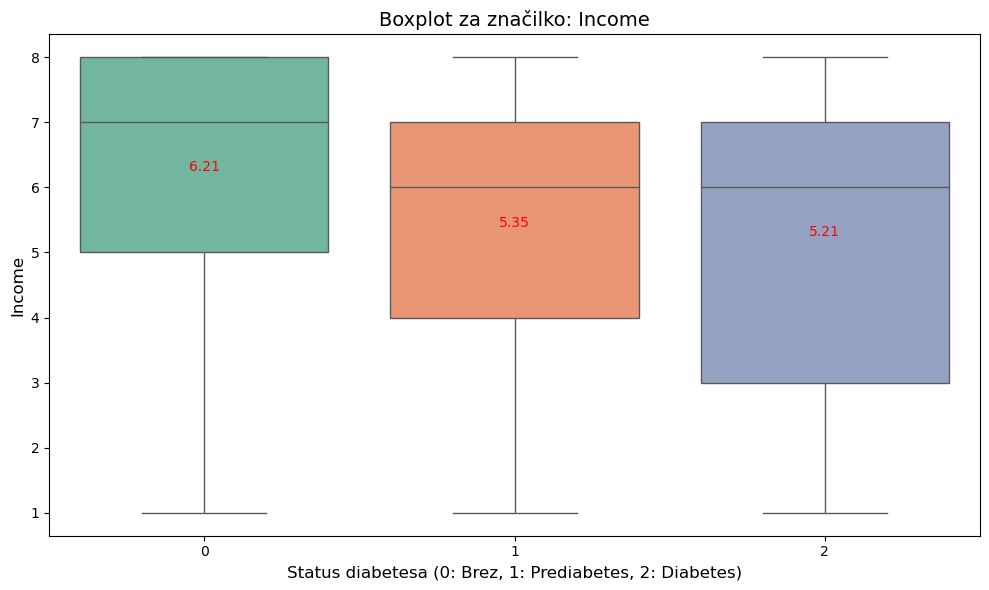

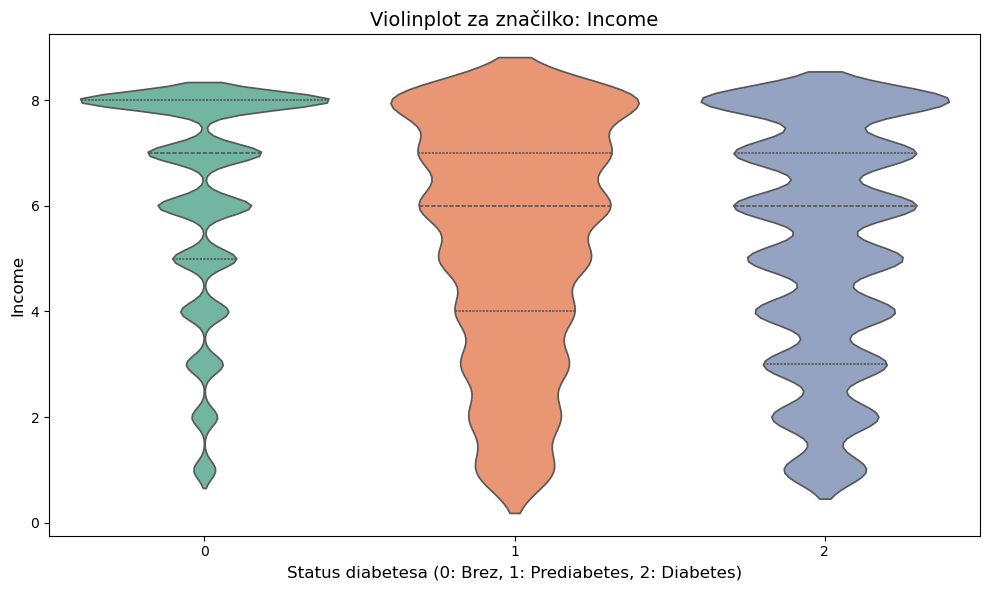

Število primerov za značilko **Income**

Income,1,2,3,4,5,6,7,8
Diabetes_012,,,,,,,,
0,7114,8341,12005,15622,20792,30431,37219,82179
1,314,356,421,459,587,748,735,1011
2,2383,3086,3568,4054,4504,5291,5265,7195


Relativni deleži za značilko **Income**:

Income,1,2,3,4,5,6,7,8
Diabetes_012,,,,,,,,
0,3.33,3.90,5.62,7.31,9.73,14.24,17.42,38.45
1,6.78,7.69,9.09,9.91,12.68,16.15,15.87,21.83
2,6.74,8.73,10.09,11.47,12.74,14.97,14.90,20.36


In [66]:
feature = 'Income'

# Izris boxplota
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y=feature, data=data, palette="Set2", hue='Diabetes_012', legend=False)
# sns.stripplot(x='Diabetes_012', y=feature, data=data, color='black', alpha=0.5, jitter=True)

# Dodajanje povprečne vrednosti na boxplot
mean_values = data.groupby('Diabetes_012')[feature].mean()
for i, mean in enumerate(mean_values):
    plt.text(i, mean, f'{mean:.2f}', color='red', ha='center', va='bottom', fontsize=10)

# Prilagoditev osi in naslovov
plt.title(f"Boxplot za značilko: {feature}", fontsize=14)
plt.xlabel("Status diabetesa (0: Brez, 1: Prediabetes, 2: Diabetes)", fontsize=12)
plt.ylabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

#alternativni prikaz podatkov
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes_012', y=feature, data=data, palette="Set2", inner="quartile", hue='Diabetes_012', legend=False)
# sns.stripplot(x='Diabetes_012', y=feature, data=data, color='black', alpha=0.5, jitter=True)
# sns.swarmplot(x='Diabetes_012', y='HighBP', data=data, alpha=0.6)

# Naslovi in prilagoditve
plt.title(f"Violinplot za značilko: {feature}", fontsize=14)
plt.xlabel("Status diabetesa (0: Brez, 1: Prediabetes, 2: Diabetes)", fontsize=12)
plt.ylabel(feature, fontsize=12)
plt.tight_layout()
plt.show()

#število primerov z vrednostjo 0 in 1 za vsako skupino
counts = data.groupby('Diabetes_012')[feature].value_counts().unstack(fill_value=0)
display(Markdown(f"Število primerov za značilko **{feature}**"))
display(counts)

#pregled relativnih deležev
relative_counts = counts.div(counts.sum(axis=1), axis=0)
display(Markdown(f"Relativni deleži za značilko **{feature}**:"))
display((relative_counts * 100).round(2))

## Korelacijski testi

#### Pearsonov test - meri linearno razmerje med dvema spremenljivkama
https://www.youtube.com/watch?v=k7IctLRiZmo\
Ker obstaja korelacije, to še ne pomeni, da vemo v katero "smer" je korelacija\
lahko pove:\
-> kako močna je korelacija\
-> v katero smer je povezava\
koeficient r je med -1 in 1\
Če je koeficient med:\
0.0 < 0.1 - ni korelacije\
0.1 < 0.3 - nizka korelacija\
0.3 < 0.5 - srednja korelacija\
0.5 < 0.7 - visoka korelacija\
0.7 < 1 - zelo visoka korelacija

Pozitivna korelacija, r > 0 (predstavljaj si ravno linijo na grafu, ki gre od levo spodaj proti desno gor):\
-velike vrednosti prve spremenljivke so povezane z velikimi vrednostmi druge spremenljivke\
ali\
-majhne vrednosti prve spremenljivke so povezane z majhnimi vrednostmi druge spremenljivke

Negativna korelacija, r < 0 (predstavljaj si ravno linijo na grafu, ki gre od levo zgoraj proti levo dol):\
-velike vrednosti prve spremenljivke so povezane z majhnimi vrednostmi druge spremenljivke\
ali\
-majhne vrednosti prve spremenljivke so povezane z velikimi vrednostmi druge spremenljivke

P-vrednost se izračuna s pomočjo t-testa, ki uporablja r koeficient.\
Če je P-vrednost < 0.05, potem je ničelna hipoteza zavrnjena (to pomeni da sta spremenljivki v korelaciji),\
drugače, je pa ničelna hipoteza sprejeta, kar pomeni, da spremenljivki nista v korelaciji

Predpogoji za izračun pearsonovega korelacijskega koeficienta:\
-obe spremenljivki sta kvantitativni (npr. teža, plača, poraba elektrike, itd.)\
-razmerje med spremenljivkama mora biti linearno\
-obe spremenljivki morata biti normalno porazdeljeni

#### Spearmanov test - pregleda razmerje med dvema spremenljivkama
https://www.youtube.com/watch?v=XV_W1w4Nwoc\

Ne uporablja "surovih" podatkov, ampak rankirane podatke surovih podatkov (s tem so podatki porazdeljeni bolj enakomerno)\
Po tem rankiranju podatkov, pa se nad njimi uporabi izračun Pearsonove korelacije

Spearmanov korealcijski koeficient je na območju med -1 in 1\
z njim lahko povemo kako močna je korelacija in v katero smer je korelacija (pozitivna/negativna)\
->koeficient med -1 in 0 pomeni negativno korelacijo, med 0 in 1 pa pozitivno korelacijo

Ničelna hipoteza: spremenljivki nista v korelaciji (r=0)\
Alternativna hipoteza: spremenljivki sta v korelaciji (r != 0)

Če je P-vrednost < 0.05, potem je ničelna hipoteza zavrnjena (pomeni da sta spremenljivki v korelaciji)

#### Glede na ChatGPT 4o
Pearson:\
-linearna povezava med 2 kvantitativnima spremenljivkama\
-podatki morajo biti normalno porazdeljeni\
-razmerje med spremenljivkama mora biti linearno\
-podatki morajo biti brez ekstremnih vrednosti (outlierji), saj ti močno vplivajo na rezultat

Spearman:\
-meri monotono povezavo med spremenljivkama, ne glede na to če je povazava med njima linearna ali ne\
-uporablja vrstni red podatkov (ranks), zato lahko meri povezavo tudi če povezava med njima ni linearna\
-uporablja se za ordinalne spremenljivke\
-lahko tudi za kvantitativne, še posebej če so podatki nenormalno porazdeljeni ali vsebujejo outlierje\
-povezava mora biti monotona (ena spremenljivka vedno narašča ali pada z drugo, ni nujno linearno)\

In [ ]:
import pandas as pd
import numpy as np
import os
from scipy.stats import spearmanr, pearsonr, chi2_contingency, kstest

#seznam značilk glede na tip podatkov
nominal_vars = ["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", 
                "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", 
                "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "DiffWalk", "Sex"]

ordinal_vars = ["GenHlth", "Age", "Education", "Income"]
quant_vars = ["BMI", "MentHlth", "PhysHlth"]

def check_normality(data, columns):
    results = {}
    for col in columns:
        standardized_data = (data[col] - np.mean(data[col])) / np.std(data[col])
        #Kolmogorov-Smirnov test (za vecje vzorce)
        stat, p_value = kstest(standardized_data, 'norm')
        is_normal = p_value > 0.05  # Če je p > 0.05, je porazdelitev normalna
        results[col] = "Normalna" if is_normal else "Nenormalna"
    return results

def cramers_v(chi2, n, k, r):
    #hi2 ne pove veliko o moči povezave, zato uporabljam ta test
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def calculate_correlation(data, dependent_variable_str, columns, normality_array):
    
    results = []
    dependent_var = data[dependent_variable_str]
    for i in range(len(columns)):
        independent_variable_str = columns[i]
        independent_var = data[independent_variable_str]

        if independent_variable_str == dependent_variable_str:
            continue
        elif independent_variable_str in nominal_vars: #neodvisna nominalna
            contingency_table = pd.crosstab(independent_var, dependent_var)
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            method = "Chi-square"

            significant = "DA" if p_value < 0.05 else "NE"
            if p_value < 0.001:
                p_value = "manjše od 0.001"
            results.append([dependent_variable_str, independent_variable_str, "nominalna", method, chi2, p_value, significant])
            # print(f"Cramerjev V za {independent_variable_str}: {round(v, 3)}")
            # n = contingency_table.sum().sum()
            # r, k = contingency_table.shape
            # v = cramers_v(chi2, n, k, r)
            # cramer_val = round(v, 3)
            # if cramer_val > 0 and cramer_val < 0.1:
            #     connection = "zelo šibka povezava"
            # elif cramer_val >= 0.1 and cramer_val < 0.3:
            #     connection = "šibka do zmerna povezava"
            # elif cramer_val >= 0.3 and cramer_val < 0.5:
            #     connection = "zmerna do močna povezava"
            # elif cramer_val >= 0.5:
            #     connection = "močna povezava"
            
            # results.append([dependent_variable_str, independent_variable_str, "nominalna", "Cramerjev V", cramer_val, connection, significant])
        
        elif independent_variable_str in quant_vars: #neodvisna kvantitativna
            if normality_array[independent_variable_str] == 'Normalna':
                corr, p_value = pearsonr(independent_var, dependent_var)
                method = "Pearson"
            else:
                corr, p_value = spearmanr(independent_var, dependent_var)
                method = "Spearman"
            significant = "DA" if p_value < 0.05 else "NE"
            if p_value < 0.001:
                p_value = "manjše od 0.001"
            corr = round(corr, 3)
            results.append([dependent_variable_str, independent_variable_str, "kvantitativna", method, corr, p_value, significant])

        elif independent_variable_str in ordinal_vars: #neodvisna ordinalna
            corr, p_value = spearmanr(independent_var, dependent_var)
            method = "Spearman"
            significant = "DA" if p_value < 0.05 else "NE"
            if p_value < 0.001:
                p_value = "manjše od 0.001"
            corr = round(corr, 3)
            results.append([dependent_variable_str, independent_variable_str, "ordinalna", method, corr, p_value, significant])

    #pretvorba rezultatov v DataFrame
    results_df = pd.DataFrame(
        results, 
        columns=["Atribut 1", "Atribut 2", "Tip spremenljivke", "Korelacijski test", 
                 "Vrednost korelacijskega koeficienta", "Vrednost significance (p)", 
                 "Statistično značilna povezava"]
    )
    
    # results_df.to_excel(output_file, index=False)
    # print(f"Rezultati so bili shranjeni v datoteko: {os.path.abspath(output_file)}")
    
    return results_df

data = pd.read_csv("filtered_diabetes_01_health_indicators_BRFSS2015_249049.csv")
normality_array = check_normality(data, nominal_vars + ordinal_vars + quant_vars)
correlation_results = calculate_correlation(data, "Diabetes_012", nominal_vars + ordinal_vars + quant_vars, normality_array)
display(correlation_results)

,Atribut 1,Atribut 2,Tip spremenljivke,Korelacijski test,Vrednost korelacijskega koeficienta,Vrednost significance (p),Statistično značilna povezava
0,Diabetes_012,HighBP,nominalna,Chi-square,18062.621253,manjše od 0.001,DA
1,Diabetes_012,HighChol,nominalna,Chi-square,10535.036856,manjše od 0.001,DA
2,Diabetes_012,CholCheck,nominalna,Chi-square,1085.068785,manjše od 0.001,DA
3,Diabetes_012,Smoker,nominalna,Chi-square,963.543246,manjše od 0.001,DA
4,Diabetes_012,Stroke,nominalna,Chi-square,2902.810167,manjše od 0.001,DA
5,Diabetes_012,HeartDiseaseorAttack,nominalna,Chi-square,8180.574827,manjše od 0.001,DA
6,Diabetes_012,PhysActivity,nominalna,Chi-square,3647.181228,manjše od 0.001,DA
7,Diabetes_012,Fruits,nominalna,Chi-square,433.562632,manjše od 0.001,DA
8,Diabetes_012,Veggies,nominalna,Chi-square,840.515213,manjše od 0.001,DA
9,Diabetes_012,HvyAlcoholConsump,nominalna,Chi-square,835.349563,manjše od 0.001,DA


## Statistični testi za primerjavo dveh srednjih vrednosti pri kvantitativnih podatkih (t-test, welch, mann-whitney, ANOVA, kruskal-wallis)

-tukaj sem uporabil prirejeno bazo

,Atribut 1 (nominalni),Atribut 2 (kvantitativni),"Skupina 1 (povp. ± std.odkl., mediana, (Q1, Q3))","Skupina 2 (povp. ± std.odkl., mediana, (Q1, Q3))",Normalna porazdelitev,Homogenost varianc,Test,Vrednost testa,P-Value,Statistično značilna razlika
0,"(Nediabetik - 0, Daibetik - 1)",BMI,"27.74 ± 6.26 , 27.00, (24.00, 30.00)","31.94 ± 7.36 , 31.00, (27.00, 35.00)","Ne, Ne",None,Mann-Whitney U test,2.331896e+09,0.000000e+00,DA
1,"(Nediabetik - 0, Daibetik - 1)",MentHlth,"2.94 ± 7.06 , 0.00, (0.00, 2.00)","4.46 ± 8.95 , 0.00, (0.00, 3.00)","Ne, Ne",None,Mann-Whitney U test,3.564682e+09,1.080463e-95,DA
2,"(Nediabetik - 0, Daibetik - 1)",PhysHlth,"3.58 ± 8.00 , 0.00, (0.00, 2.00)","7.95 ± 11.30 , 1.00, (0.00, 15.00)","Ne, Ne",None,Mann-Whitney U test,2.910964e+09,0.000000e+00,DA


C:\Users\david\AppData\Local\Temp\ipykernel_12360\3607481442.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(
C:\Users\david\AppData\Local\Temp\ipykernel_12360\3607481442.py:109: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


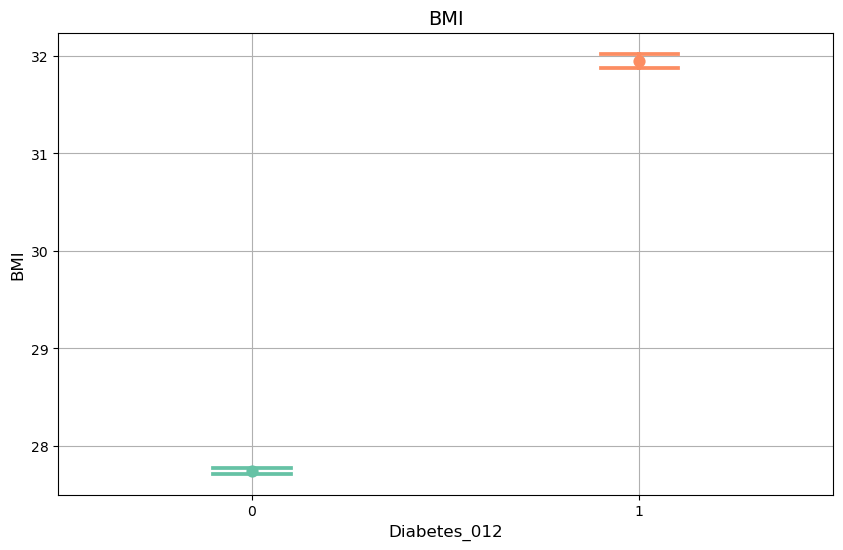

C:\Users\david\AppData\Local\Temp\ipykernel_12360\3607481442.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(
C:\Users\david\AppData\Local\Temp\ipykernel_12360\3607481442.py:109: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


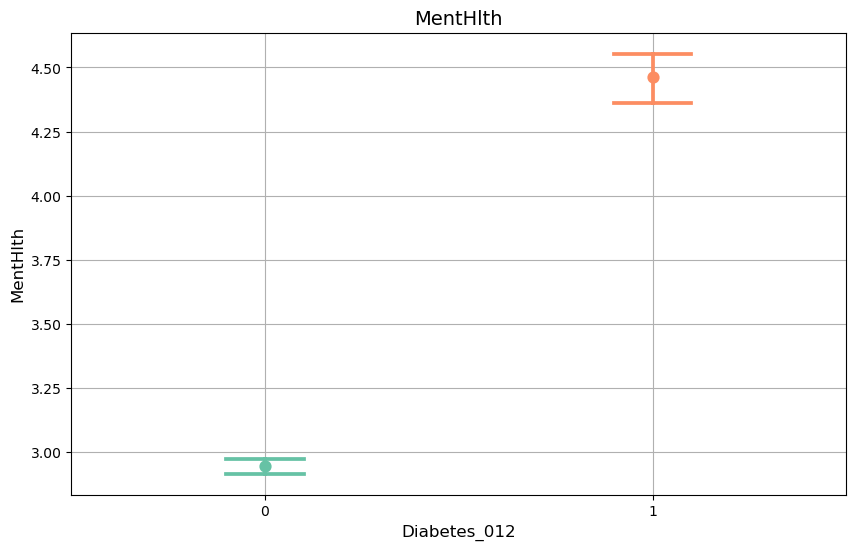

C:\Users\david\AppData\Local\Temp\ipykernel_12360\3607481442.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(
C:\Users\david\AppData\Local\Temp\ipykernel_12360\3607481442.py:109: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


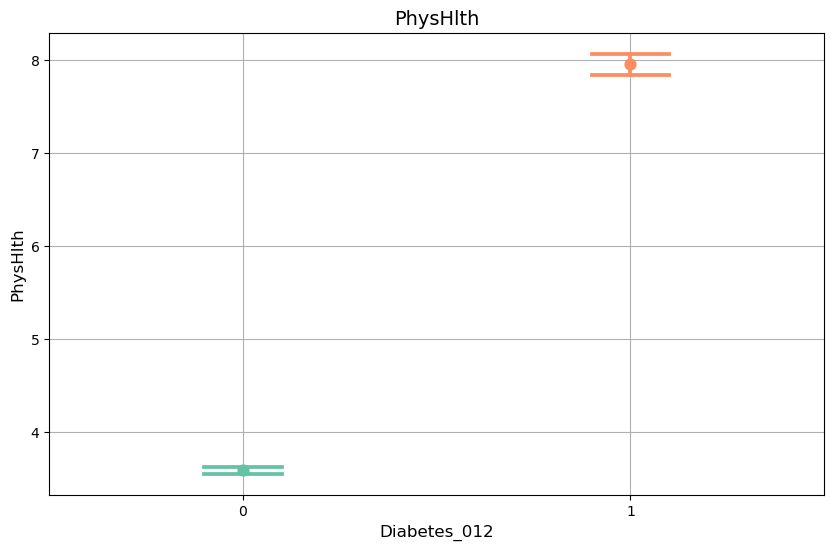

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import (mannwhitneyu, ttest_ind, kruskal, 
                        ks_2samp, kstest, levene)

file_path = "filtered_diabetes_01_health_indicators_BRFSS2015_249049.csv"
data = pd.read_csv(file_path)

# Informacije o spremenljivkah
nominal_var = "Diabetes_012"
# nominal_vars = ["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", 
#                 "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", 
#                 "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "DiffWalk", "Sex"]
# ordinal_vars = ["GenHlth", "Age", "Education", "Income"]
quantitative_vars = ["BMI", "MentHlth", "PhysHlth"]

# def plot_interval(df, nominal, numerical, mode="Predtest"):
#     df_melted = df.melt(id_vars=[nominal], value_vars=numerical,
#                         var_name='Modul', value_name=mode)

#     #sns za izris
#     plt.figure(figsize=(12, 8))
#     sns.pointplot(
#         data=df_melted,
#         x='Modul',  #kategorije
#         y=mode,  #numeric value
#         hue=nominal,  #unikatne skupine pod kategorijo
#         errorbar=('ci', 95), #95 zaupanje
#         dodge=True,  # Loči točke med skupinami
#         markers=['o', 's', 'D'],
#         capsize=0.2,  # Dolžina črtice za interval zaupanja
#         err_kws={'linewidth': 1.5}, #sirina
#         palette='Set2',
#         linestyles='' #brez crt med njimi
#     )
#     plt.title('Intervalni diagram (mean ± 95% IZ)', fontsize=16)
#     plt.xlabel('Modul', fontsize=14)
#     plt.ylabel(f'{mode} vrednosti', fontsize=14)
#     plt.legend(title=nominal)
#     plt.grid(True)
#     plt.show()

# def plot_interval(df, nominal, numerical, mode="Predtest"):
#     # Pretvorba iz širokega v dolg format, kjer:
#     # - id_vars: nominalna spremenljivka (npr. Diabetes_012)
#     # - value_vars: kvantitativne spremenljivke (npr. BMI, ...)
#     # Rezultat ima stolpec "Modul" z imeni kvantitativnih spremenljivk 
#     # in stolpec, ki ga imenujemo po parametru mode, kjer so vrednosti.
#     df_melted = df.melt(id_vars=[nominal], value_vars=numerical,
#                         var_name='Modul', value_name=mode)

#     # Izris grafa
#     plt.figure(figsize=(12, 8))
#     sns.pointplot(
#         data=df_melted,
#         x=nominal,    # x-os: nominalna spremenljivka (npr. Diabetes_012, vrednosti 0 in 1)
#         y=mode,       # y-os: kvantitativne vrednosti (npr. BMI)
#         hue='Modul',  # Ločimo posamezne kvantitativne spremenljivke, če jih je več
#         errorbar=('ci', 95),  # Interval zaupanja 95%
#         dodge=True,           # Loči točke med skupinami
#         markers=['o', 's', 'D'],  # Označevalci
#         capsize=0.2,          # Dolžina črtice za interval zaupanja
#         err_kws={'linewidth': 1.5},  # Debelina črtice intervala zaupanja
#         palette='Set2',
#         linestyles=''         # Brez črt med točkami
#     )
#     plt.title('Intervalni diagram (mean ± 95% IZ)', fontsize=16)
#     plt.xlabel(nominal, fontsize=14)
#     plt.ylabel(f'{mode} vrednosti', fontsize=14)
#     plt.legend(title='Modul')
#     plt.grid(True)
#     plt.show()

# def plot_interval(df, nominal, numerical, mode="Predtest"):
#     # Pretvorba iz širokega v dolg format.
#     # Uporabimo novo ime stolpca 'Value', ki se ne nahaja med originalnimi stolpci.
#     df_melted = df.melt(id_vars=[nominal], value_vars=numerical,
#                         var_name='Modul', value_name='Value')
    
#     # Izris grafa
#     plt.figure(figsize=(12, 8))
#     sns.pointplot(
#         data=df_melted,
#         x=nominal,     # Nominalna spremenljivka (npr. Diabetes_012: 0 in 1)
#         y='Value',     # Kvantitativne vrednosti (npr. BMI)
#         hue='Modul',   # Če je več kvantitativnih spremenljivk, jih loči
#         errorbar=('ci', 95),  # Interval zaupanja 95%
#         dodge=True,           # Loči točke med skupinami
#         markers=['o', 's', 'D'],  
#         capsize=0.2,          # Dolžina črtice intervala zaupanja
#         err_kws={'linewidth': 1.5},  # Debelina intervala zaupanja
#         palette='Set2',
#         linestyles=''         # Brez črt med točkami
#     )
#     plt.title('Intervalni diagram (mean ± 95% IZ)', fontsize=16)
#     plt.xlabel(nominal, fontsize=14)
#     # V oznako osi y vključimo ime spremenljivke (mode), npr. "BMI vrednosti"
#     plt.ylabel(f'{mode} vrednosti', fontsize=14)
#     plt.legend(title='Modul')
#     plt.grid(True)
#     plt.show()

def plot_interval(df, nominal, quantitative, title=None):
    plt.figure(figsize=(10, 6))
    
    # Uporabimo pointplot, ki samodejno izračuna povprečje in prikaže 95% interval zaupanja.
    sns.pointplot(
        x=nominal, 
        y=quantitative,
        data=df, 
        errorbar=('ci', 95),
        capsize=0.2,
        palette='Set2',
        join=False
    )
    
    plt.xlabel(nominal, fontsize=12)
    plt.ylabel(quantitative, fontsize=12)
    
    if title is None:
        title = f'Interval zaupanja 95% za {quantitative} po {nominal}'
    plt.title(title, fontsize=14)
    
    plt.grid(True)
    plt.show()

def test_normality(group):
    # Kolmogorov-Smirnov test
    standardized_group = (group - np.mean(group)) / np.std(group)
    stat, p_value = kstest(standardized_group, 'norm')
    return p_value > 0.05

def test_homogenity(group1, group2):
    #Leveneov test za homogenost varianc
    stat, p = levene(group1, group2)
    return stat, p, p >= 0.05  # True, če so variance homogene

results = []

for var in data.columns:
    if var == nominal_var:
        continue
    
    # if var in ordinal_vars:  #Ordinalne spremenljivke
    #     # stat, p_value = kruskal(
    #     #     data[var][data[dependent_var] == 0],
    #     #     data[var][data[dependent_var] == 2]
    #     # )
    #     stat, p_value = mannwhitneyu(
    #             data[var][data[dependent_var] == 0],
    #             data[var][data[dependent_var] == 2]
    #     )
    #     test_type = "Mann-Whitney test"
    
    if var in quantitative_vars:  #Kvantitativne spremenljivke
        groups = data[nominal_var].unique()
        group1 = data[var][data[nominal_var] == 0] #kvantitativne vrednosti nediabetikov
        group2 = data[var][data[nominal_var] == 1] #kvantitativne vrednosti diabetikov
        
        #preverjanje normalnosti
        normal_0 = test_normality(group1)
        normal_1 = test_normality(group2)
        
        p_value = None
        homogenity = None
        if normal_0 and normal_1:  #obe skupini podatkov normalno porazdeljeni
            # Preveri enakost varianc
            stat_var, homogenity_p_value, homogenity = test_homogenity(group1, group2)
            if homogenity:  #variance enake
                stat, p_value = ttest_ind(group1, group2, equal_var=True)
                test_type = "T-test"
            else:  #variance niso enake
                stat, p_value = ttest_ind(group1, group2, equal_var=False)
                test_type = "Welch's T-test"
        else:  #ni normalno porazdeljeno
            stat, p_value = mannwhitneyu(group1, group2)
            test_type = "Mann-Whitney U test"
    
        results.append({
            "Atribut 1 (nominalni)" : "(Nediabetik - 0, Daibetik - 1)",
            "Atribut 2 (kvantitativni)": var,
            "Skupina 1 (povp. ± std.odkl., mediana, (Q1, Q3))": f'{group1.mean():.2f} ± {group1.std():.2f} , {group1.median():.2f}, ({group1.quantile(0.25):.2f}, {group1.quantile(0.75):.2f})',
            "Skupina 2 (povp. ± std.odkl., mediana, (Q1, Q3))": f'{group2.mean():.2f} ± {group2.std():.2f} , {group2.median():.2f}, ({group2.quantile(0.25):.2f}, {group2.quantile(0.75):.2f})',
            "Normalna porazdelitev": f'{"Da" if normal_0 else "Ne"}, {"Da" if normal_1 else "Ne"}',
            "Homogenost varianc": homogenity,
            "Test": test_type,
            "Vrednost testa": stat,
            "P-Value": p_value,
            "Statistično značilna razlika": "DA" if p_value < 0.05 else "NE"
        })

results_df = pd.DataFrame(results)

# Manjša p-vrednost pomeni manjšo verjetnost, da so rezultati naključni, in zato večjo verjetnost, da je razlika med povprečjema spremenljivke statistično značilna
# results_df_sorted = results_df.sort_values(by="P-Value", ascending=True)
display(results_df)

for var in quantitative_vars:
    plot_interval(data, "Diabetes_012", var, var)

## Dva primera optimizacije in njene spremenljivke

Večina spremenljivk imam nominalnih, vključno z odvisno spremenljivko.\
Ostale pa so BMI (1 - 9999), MenHlth (0-30), PhysHlth (0-30), ki so kvantitativne,\
GenHlth (1-5), Age (1-13), Education (1-6) in Income (1-8) pa so ordinalne spremenljivke. (Max 13)

"Naredite regresijski model in vsaj en inteligentni model, ki vam na osnovi 
vseh neodvisnih spremenljivk napoveduje odvisno spremenljivko. 
Optimizirajte model tako, da odstranite spremenljivke, ki niso statistično 
značilno pomembne. Opišite model. (za vsak primer posebej)"

- ### Optimizacija 1 - Napovedni model za diabetis (Verjetnost ali oseba ima diabetis glede na vhodne podatke)
Odvisna spremenljivka: Diabetis_012\
Neodvisna spremenljivka: ostale spremenljivke v predobdelani bazi

Logistic regression in RandomForest (ali pa namesto foresta neka osnovna kovnolucijska mreža ki bo dobro napovedovala diabetis glede na moje podatke iz baze)
Optimizacije mislim da moram narediti tako da se osredotočim na spremenljivke iz baze, ki najbolj vplivajo na to ali oseba ima diabetis ali pa ne. Za to bi moral uporabiti statistične teste na bazi da ugotovim katera spremenljivka najbolj vpliva na diabetis kot odvisno spremenljivko.

- ### Optimizacija 2 - Model, ki pacientu v stanju prediabetik pove kaj mora spremeniti, da bo (verjetno) prešel v stanje nediabetika



Rezultati logistične regresije:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92     64038
           2       0.54      0.17      0.26     10677

    accuracy                           0.86     74715
   macro avg       0.71      0.57      0.59     74715
weighted avg       0.83      0.86      0.83     74715

Točnost modela: 0.8608043900153918


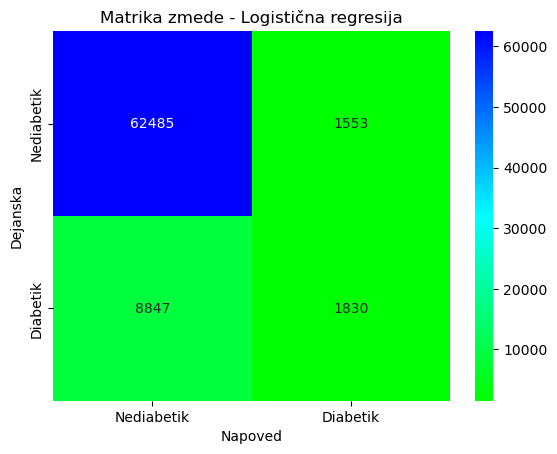

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors

custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_blue_green', ['lime', 'cyan', 'blue']
)

filtered_data = pd.read_csv('filtered_diabetes_01_health_indicators_BRFSS2015_249049.csv')

X = filtered_data.drop('Diabetes_012', axis=1)  # Vse spremenljivke razen Diabetes_012
y = filtered_data['Diabetes_012']  # Odvisna spremenljivka

X_train, X_test, y_train_reduced, y_test_reduced = train_test_split(X, y, test_size=0.3, random_state=42)

#Logistična regresija
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train_reduced)

y_pred_log = log_reg.predict(X_test)

print("Rezultati logistične regresije:")
print(classification_report(y_test_reduced, y_pred_log))
print("Točnost modela:", accuracy_score(y_test_reduced, y_pred_log))

#Confusion matrix logističe regresije
conf_matrix_log = confusion_matrix(y_test_reduced, y_pred_log)
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap=custom_cmap, xticklabels=['Nediabetik', 'Diabetik'], yticklabels=['Nediabetik', 'Diabetik'])
plt.title('Matrika zmede - Logistična regresija')
plt.xlabel('Napoved')
plt.ylabel('Dejanska')
plt.show()

Rezultati Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     64038
           2       0.50      0.20      0.28     10677

    accuracy                           0.86     74715
   macro avg       0.69      0.58      0.60     74715
weighted avg       0.82      0.86      0.83     74715

Točnost modela: 0.8573111155725088


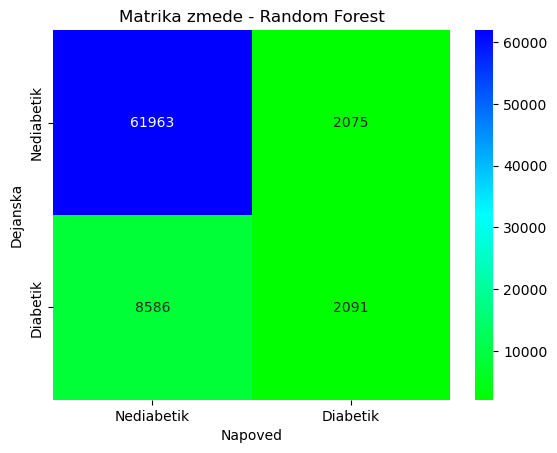

In [9]:
#Random forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train_reduced)

# Napovedi na testnih podatkih
y_pred_rf = rf_model.predict(X_test)

# Rezultati Random Forest
print("Rezultati Random Forest:")
print(classification_report(y_test_reduced, y_pred_rf))
print("Točnost modela:", accuracy_score(y_test_reduced, y_pred_rf))

# Vizualiziraj matriko zmede (confusion matrix)
conf_matrix_rf = confusion_matrix(y_test_reduced, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap=custom_cmap, xticklabels=['Nediabetik', 'Diabetik'], yticklabels=['Nediabetik', 'Diabetik'])
plt.title('Matrika zmede - Random Forest')
plt.xlabel('Napoved')
plt.ylabel('Dejanska')
plt.show()

## Optimizacija problema 1

Rezultati logistične regresije (optimiziran):
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     64038
           2       0.51      0.10      0.16     10677

    accuracy                           0.86     74715
   macro avg       0.69      0.54      0.54     74715
weighted avg       0.82      0.86      0.81     74715

Točnost modela: 0.8577126413705414


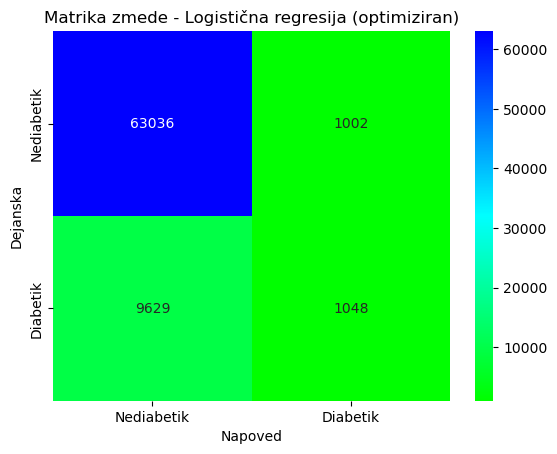

Rezultati Random Forest (optimiziran):
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     64038
           2       0.40      0.13      0.20     10677

    accuracy                           0.85     74715
   macro avg       0.63      0.55      0.56     74715
weighted avg       0.80      0.85      0.81     74715

Točnost modela: 0.8475406544870508


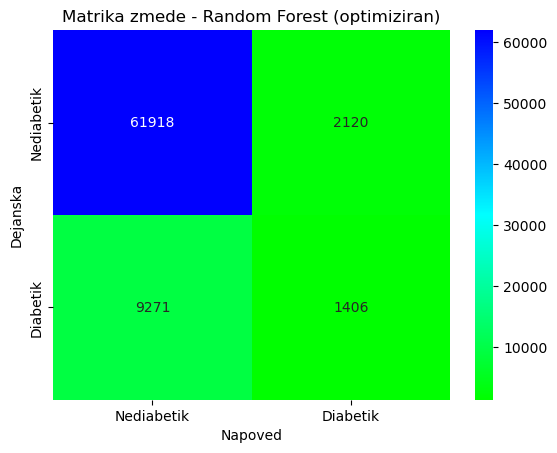

In [ ]:
#Spremenljivke ki imajo najmanjsi vpliv glede na statistične teste (ampak so še vseeeno statistično signifikantne)
# X_reduced = X.drop(['CholCheck', 'Smoker', 'Veggies', 'HvyAlcoholConsump', 'Fruits', 'MentHlth', 'NoDocbcCost', 'Sex', 'AnyHealthcare'], axis=1)

#Spremenljivke ki imajo negativno korelacijo z odvisno spremenljivko
# X_reduced = X.drop(['Income', 'Education', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump'], axis=1)

#Spremenljivke, ki imajo VIF nad 10
# X_reduced = X.drop(['Education', 'CholCheck', 'AnyHealthcare', 'BMI', 'Income', 'GenHlth'], axis=1)

#Spremenljivke, ki imajo VIF nad 5 (isto kot prej samo dodal Age in Veggies)
X_reduced = X.drop(['Education', 'CholCheck', 'AnyHealthcare', 'BMI', 'Income', 'GenHlth', 'Age', 'Veggies'], axis=1)

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

#Logistična regresija
log_reg_reduced = LogisticRegression(max_iter=1000)
log_reg_reduced.fit(X_train_reduced, y_train_reduced)

y_pred_log_reduced = log_reg_reduced.predict(X_test_reduced)

print("Rezultati logistične regresije (optimiziran):")
print(classification_report(y_test_reduced, y_pred_log_reduced))
print("Točnost modela:", accuracy_score(y_test_reduced, y_pred_log_reduced))

# # Vpliv preostalih spremenljivk na napoved (koeficienti)
# coefficients_reduced = pd.DataFrame({
#     'Spremenljivka': X_reduced.columns,
#     'Utež': log_reg_reduced.coef_[0]
# }).sort_values(by='Utež', ascending=True)
# print(coefficients_reduced)

#matrika zmede
conf_matrix_log_reduced = confusion_matrix(y_test_reduced, y_pred_log_reduced)
sns.heatmap(conf_matrix_log_reduced, annot=True, fmt='d', cmap=custom_cmap, xticklabels=['Nediabetik', 'Diabetik'], yticklabels=['Nediabetik', 'Diabetik'])
plt.title('Matrika zmede - Logistična regresija (optimiziran)')
plt.xlabel('Napoved')
plt.ylabel('Dejanska')
plt.show()

#Random Forest
rf_reduced = RandomForestClassifier(random_state=42)
rf_reduced.fit(X_train_reduced, y_train_reduced)

y_pred_rf_reduced = rf_reduced.predict(X_test_reduced)

print("Rezultati Random Forest (optimiziran):")
print(classification_report(y_test_reduced, y_pred_rf_reduced))
print("Točnost modela:", accuracy_score(y_test_reduced, y_pred_rf_reduced))

# # Pomembnost spremenljivk pri Random Forest
# feature_importances = pd.DataFrame({
#     'Spremenljivka': X_reduced.columns,
#     'Pomembnost': rf_reduced.feature_importances_
# }).sort_values(by='Pomembnost', ascending=False)
# print(feature_importances)

# Confusion matrix za Random Forest
conf_matrix_rf = confusion_matrix(y_test_reduced, y_pred_rf_reduced)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap=custom_cmap, xticklabels=['Nediabetik', 'Diabetik'], yticklabels=['Nediabetik', 'Diabetik'])
plt.title('Matrika zmede - Random Forest (optimiziran)')
plt.xlabel('Napoved')
plt.ylabel('Dejanska')
plt.show()

## Problem 2

Natrenirati model, ki uporablja originalno bazo. Model bi naj osebam, ki so prediabetiki predlagal, kaj naj spremenijo, da več ne bodo v nevarnosti, da bi potencialno dobili sladkorno bolezen. 

Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64
Diabetes_012
0    213703
1      4631
Name: count, dtype: int64
Filtrirani podatki so shranjeni v datoteko 'diabetes_01_health_indicators_BRFSS2015_218334.csv'.
Logistična regresija:
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     64180
           1       0.03      0.31      0.06      1425
           2       0.35      0.59      0.44     10499

    accuracy                           0.65     76104
   macro avg       0.44      0.52      0.43     76104
weighted avg       0.85      0.65      0.72     76104



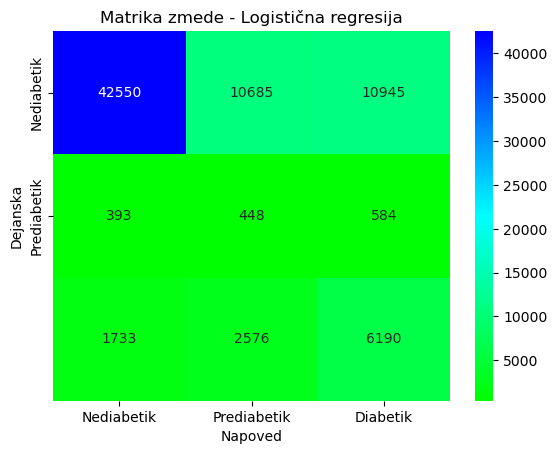

Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     64180
           1       0.01      0.00      0.00      1425
           2       0.45      0.16      0.24     10499

    accuracy                           0.84     76104
   macro avg       0.44      0.38      0.38     76104
weighted avg       0.79      0.84      0.80     76104



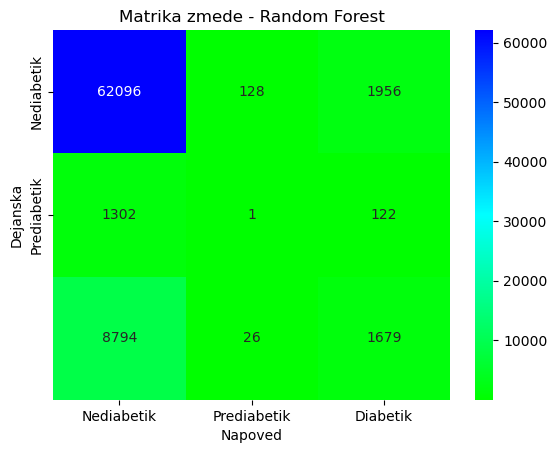

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    'custom_blue_green', ['lime', 'cyan', 'blue']
)

file_path = 'diabetes_012_health_indicators_BRFSS2015_253680.csv'
original_data = pd.read_csv(file_path)
print(original_data['Diabetes_012'].value_counts())

#Izbris diabetikov
filtered_data = original_data[original_data['Diabetes_012'] != 2]
print(filtered_data['Diabetes_012'].value_counts())
filtered_data.to_csv('diabetes_01_health_indicators_BRFSS2015_218334.csv', index=False)
print("Filtrirani podatki so shranjeni v datoteko 'diabetes_01_health_indicators_BRFSS2015_218334.csv'.")

# Neodvisne in odvisne spremenljivke
X = original_data.drop('Diabetes_012', axis=1) #neodvisne spremenljivke
y = original_data['Diabetes_012'] #ciljna spremenljivka

# Delitev podatkov na učne in testne
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Normalizacija kvantiativnih spremenljivk
quantitative_vars = ["BMI", "MentHlth", "PhysHlth"]
scaler = MinMaxScaler()
# data[quantitative_vars] = scaler.fit_transform(data[quantitative_vars])
X_train[quantitative_vars] = scaler.fit_transform(X_train[quantitative_vars])
X_test[quantitative_vars] = scaler.transform(X_test[quantitative_vars])

# Model logistične regresije
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Model Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Napovedi in evalvacija - Logistična regresija
y_pred_log = log_reg.predict(X_test)
print("Logistična regresija:")
print(classification_report(y_test, y_pred_log))

conf_matrix_lr = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap=custom_cmap, xticklabels=['Nediabetik', 'Prediabetik', 'Diabetik'], yticklabels=['Nediabetik', 'Prediabetik'])
plt.title('Matrika zmede - Logistična regresija')
plt.xlabel('Napoved')
plt.ylabel('Dejanska')
plt.show()


# Napovedi in evalvacija - Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap=custom_cmap, xticklabels=['Nediabetik', 'Prediabetik', 'Diabetik'], yticklabels=['Nediabetik', 'Prediabetik'])
plt.title('Matrika zmede - Random Forest')
plt.xlabel('Napoved')
plt.ylabel('Dejanska')
plt.show()

#### Analiza uteži pri LR in pomembnosti značilk pri RF

In [32]:
#filtrirana podatkovna baza
file_path = 'diabetes_01_health_indicators_BRFSS2015_218334.csv'
data_filtered = pd.read_csv(file_path)

X = data_filtered.drop('Diabetes_012', axis=1)  # Neodvisne spremenljivke
y = data_filtered['Diabetes_012']               # Odvisna spremenljivka

log_reg_binary = LogisticRegression(max_iter=1000, class_weight='balanced')
rf_model_binary = RandomForestClassifier(random_state=42)

log_reg_binary.fit(X, y)
rf_model_binary.fit(X, y)

#analiza uteži (Logistična regresija)
coefficients = pd.DataFrame({
    'Spremenljivka': X.columns,
    'Utež': log_reg_binary.coef_[0]
}).sort_values(by='Utež', ascending=False)
print("Logistična regresija - uteži:")
print(coefficients)

#analiza pomembnosti značilk (Random Forest)
feature_importances = pd.DataFrame({
    'Spremenljivka': X.columns,
    'Pomembnost': rf_model_binary.feature_importances_
}).sort_values(by='Pomembnost', ascending=False)
print("Random Forest - pomembnost značilk:")
print(feature_importances)

Logistična regresija - uteži:
           Spremenljivka      Utež
2              CholCheck  0.843757
1               HighChol  0.591530
12           NoDocbcCost  0.418703
0                 HighBP  0.372593
13               GenHlth  0.324852
18                   Age  0.140091
17                   Sex  0.079128
3                    BMI  0.061593
14              MentHlth  0.007769
15              PhysHlth -0.004535
8                 Fruits -0.016763
6   HeartDiseaseorAttack -0.028357
4                 Smoker -0.037505
7           PhysActivity -0.044250
9                Veggies -0.044735
11         AnyHealthcare -0.058455
16              DiffWalk -0.067210
19             Education -0.069875
20                Income -0.077635
5                 Stroke -0.117315
10     HvyAlcoholConsump -0.201951
Random Forest - pomembnost značilk:
           Spremenljivka  Pomembnost
3                    BMI    0.187501
18                   Age    0.127075
20                Income    0.103510
15              

Logistična regresija

    Pozitivne uteži: Pokažejo značilke, ki povečujejo verjetnost prediabetika (Diabetes_012 = 1), ko se njihove vrednosti povečujejo.
        Največji vpliv: CholCheck (0.770), HighChol (0.575), HighBP (0.397).
        Te značilke kažejo, da imajo osebe, ki so preverile holesterol in imajo visok holesterol ali visok krvni pritisk, večjo verjetnost prediabetesa.
    Negativne uteži: Pokažejo značilke, ki zmanjšujejo verjetnost prediabetika, ko se njihove vrednosti povečujejo.
        Najnižji vpliv: HvyAlcoholConsump (-0.143), Stroke (-0.121), AnyHealthcare (-0.077).
        To nakazuje, da so osebe z zdravstvenim zavarovanjem ali tiste, ki ne uživajo alkohola, manj verjetno prediabetiki.

Random Forest

    Najbolj pomembne značilke:
        BMI (18.8%): Telesna masa je najmočnejši napovednik.
        Age (12.7%): Starost ima prav tako velik vpliv.
        Income (10.3%): Dohodek vpliva na zdrav življenjski slog in prehrano.

    Najmanj pomembne značilke:
        CholCheck (0.5%), AnyHealthcare (1.0%): Te značilke model šteje za manj pomembne.

---------------------------------------------------------------------------------------------
Razlike med modeli:

    Logistična regresija ocenjuje CholCheck kot najpomembnejšo značilko, medtem ko jo Random Forest uvršča na dno.
    BMI in Age sta pri Random Forest bistveno bolj pomembna kot pri logistični regresiji.

Konsistentne značilke:

    Značilke, kot so BMI, Age, Income, so ključne za oba modela, kar potrjuje njihovo pomembnost.

## Binarna modela za priporočila prediabetikom

In [ ]:
import pandas as pd
import numpy as np

# Osredotočimo se na prediabetike
prediabetics = data_filtered[data_filtered['Diabetes_012'] == 1].copy()
print(prediabetics['Diabetes_012'].value_counts())
prediabetics.to_csv('prediabetic_only.csv', index=False)

# Sprememba izbranih značilk za analizo
# selected_features = ['BMI', 'HighBP', 'HighChol', 'PhysActivity']  # Značilke za simulacijo
# Širši obseg in več značilk
selected_features = X.columns.tolist()
# step_size = 0.05  # Velikost koraka za spremembo značilke
step_size = 1

recommendations = []

max_iterations = 21  # Nastavimo največje dovoljeno število iteracij
for index, row in prediabetics.iterrows():
    modified_row = row.copy()
    previous_proba = log_reg_binary.predict_proba(pd.DataFrame([modified_row[X.columns]], columns=X.columns))[0]
    print(previous_proba)
    iteration = 0  # Števec iteracij
    
    while iteration < max_iterations:
        improved = False  # Sledenje, če je prišlo do izboljšanja
        
        for feature in selected_features:
            for direction in [-1, 1]:  # Znižanje ali povišanje
                temp_row = modified_row.copy()
                temp_row[feature] += direction * step_size
                
                #kvantitativne spremenljivke
                if feature == 'BMI':
                    temp_row[feature] = temp_row[feature].clip(0, 9999)
                elif feature in ['MenHlth', 'PhysHlth']:
                    temp_row[feature] = temp_row[feature].clip(0, 30)

                #ordinalne spremenljivke
                elif feature == 'GenHlth':
                    temp_row[feature] = temp_row[feature].clip(1, 5)
                elif feature == 'Age':
                    temp_row[feature] = temp_row[feature].clip(1, 13)
                elif feature == 'Education':
                    temp_row[feature] = temp_row[feature].clip(1, 6)
                elif feature == 'Income':
                    temp_row[feature] = temp_row[feature].clip(1, 8)

                #nominalne spremenljivke
                elif feature in ['HighBP', 'HighChol', 'PhysActivity', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']:
                    temp_row[feature] = temp_row[feature].clip(0, 1)
                
                # Preveri novo napoved
                proba = log_reg_binary.predict_proba(pd.DataFrame([temp_row[X.columns]], columns=X.columns))[0]
                
                if proba[0] > previous_proba[0]:  # Če je izboljšanje, posodobi
                    modified_row = temp_row
                    previous_proba = proba
                    improved = True  # Označi, da je prišlo do izboljšanja
                    
        # Če dosežemo prag za nediabetika, zaključimo
        if previous_proba[0] > 0.8:
            print(f"After improvements {previous_proba} probability")
            recommendations.append({
                'Index': index,
                'Modified Row': modified_row,
                'Probability (Nediabetik)': previous_proba
            })
            break
        
        # Če ni več izboljšav, končaj zanko
        if not improved:
            break
        
        iteration += 1  # Povečaj števec iteracij

# Pretvori priporočila v DataFrame
recommendations_df = pd.DataFrame(recommendations)

# Preveri, če obstajajo rezultati
if not recommendations_df.empty:
    recommendations_df.sort_values(by=['Index'], ascending=True, inplace=True)
    print(f"Število priporočil: {len(recommendations)}")
    
    output_file = 'prediabetic_recommendations.csv'
    recommendations_df.to_csv(output_file, index=False)
    print(f"Priporočila so bila shranjena v datoteko: {output_file}")
else:
    print("Ni priporočil za nobenega prediabetika.")

Diabetes_012
1    4631
Name: count, dtype: int64
[0.15824708 0.84175292]
After improvements [0.83509805 0.16490195] probability
[0.33177721 0.66822279]
After improvements [0.91579604 0.08420396] probability
[0.43614376 0.56385624]
After improvements [0.93542167 0.06457833] probability
[0.13455084 0.86544916]
After improvements [0.82668703 0.17331297] probability
[0.28234994 0.71765006]
After improvements [0.86796223 0.13203777] probability
[0.29431576 0.70568424]
After improvements [0.92452719 0.07547281] probability
[0.35887545 0.64112455]
After improvements [0.86864296 0.13135704] probability
[0.2204002 0.7795998]
After improvements [0.84909017 0.15090983] probability
[0.17269064 0.82730936]
After improvements [0.87840598 0.12159402] probability
[0.2250033 0.7749967]
After improvements [0.87412234 0.12587766] probability
[0.32048532 0.67951468]
After improvements [0.8211828 0.1788172] probability
[0.29490625 0.70509375]
After improvements [0.80007673 0.19992327] probability
[0.139618

##### Random forest model

In [41]:
import pandas as pd
import numpy as np

# Osredotočimo se na prediabetike
prediabetics = data_filtered[data_filtered['Diabetes_012'] == 1].copy()
print(prediabetics['Diabetes_012'].value_counts())
prediabetics.to_csv('prediabetic_only.csv', index=False)

# Sprememba izbranih značilk za analizo
selected_features = X.columns.tolist()
step_size = 1

recommendations = []

max_iterations = 21  # Nastavimo največje dovoljeno število iteracij
for index, row in prediabetics.iterrows():
    modified_row = row.copy()
    # Napoved verjetnosti z Random Forest
    previous_proba = rf_model_binary.predict_proba(pd.DataFrame([modified_row[X.columns]], columns=X.columns))[0]
    print(previous_proba)
    iteration = 0  # Števec iteracij
    
    while iteration < max_iterations:
        improved = False  # Sledenje, če je prišlo do izboljšanja
        
        for feature in selected_features:
            for direction in [-1, 1]:  # Znižanje ali povišanje
                temp_row = modified_row.copy()
                temp_row[feature] += direction * step_size
                
                # Kvantitativne spremenljivke
                if feature == 'BMI':
                    temp_row[feature] = temp_row[feature].clip(0, 9999)
                elif feature in ['MenHlth', 'PhysHlth']:
                    temp_row[feature] = temp_row[feature].clip(0, 30)

                # Ordinalne spremenljivke
                elif feature == 'GenHlth':
                    temp_row[feature] = temp_row[feature].clip(1, 5)
                elif feature == 'Age':
                    temp_row[feature] = temp_row[feature].clip(1, 13)
                elif feature == 'Education':
                    temp_row[feature] = temp_row[feature].clip(1, 6)
                elif feature == 'Income':
                    temp_row[feature] = temp_row[feature].clip(1, 8)

                # Nominalne spremenljivke
                elif feature in ['HighBP', 'HighChol', 'PhysActivity', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']:
                    temp_row[feature] = temp_row[feature].clip(0, 1)
                
                # Preveri novo napoved z Random Forest
                proba = rf_model_binary.predict_proba(pd.DataFrame([temp_row[X.columns]], columns=X.columns))[0]
                
                if proba[0] > previous_proba[0]:  # Če je izboljšanje, posodobi
                    modified_row = temp_row
                    previous_proba = proba
                    improved = True  # Označi, da je prišlo do izboljšanja
                    
        # Če dosežemo prag za nediabetika, zaključimo
        if previous_proba[0] > 0.8:
            print(f"After improvements {previous_proba} probability")
            recommendations.append({
                'Index': index,
                'Modified Row': modified_row,
                'Probability (Nediabetik)': previous_proba
            })
            break
        
        # Če ni več izboljšav, končaj zanko
        if not improved:
            break
        
        iteration += 1  # Povečaj števec iteracij

# Pretvori priporočila v DataFrame
recommendations_df = pd.DataFrame(recommendations)

# Preveri, če obstajajo rezultati
if not recommendations_df.empty:
    recommendations_df.sort_values(by=['Index'], ascending=True, inplace=True)
    print(f"Število priporočil: {len(recommendations)}")
    
    output_file = 'prediabetic_recommendations_rf.csv'
    recommendations_df.to_csv(output_file, index=False)
    print(f"Priporočila so bila shranjena v datoteko: {output_file}")
else:
    print("Ni priporočil za nobenega prediabetika.")

Diabetes_012
1    4631
Name: count, dtype: int64
[0.36 0.64]
After improvements [1. 0.] probability
[0.33 0.67]
After improvements [1. 0.] probability
[0.41 0.59]
After improvements [1. 0.] probability
[0.39 0.61]
After improvements [0.99 0.01] probability
[0.41 0.59]
After improvements [1. 0.] probability
[0.33 0.67]
After improvements [1. 0.] probability
[0.35 0.65]
After improvements [1. 0.] probability
[0.27 0.73]
After improvements [1. 0.] probability
[0.27 0.73]
After improvements [1. 0.] probability
[0.38 0.62]
After improvements [1. 0.] probability
[0.39 0.61]
After improvements [0.98 0.02] probability
[0.31 0.69]
After improvements [1. 0.] probability
[0.33 0.67]
After improvements [0.99 0.01] probability
[0.34 0.66]
After improvements [1. 0.] probability
[0.32 0.68]
After improvements [1. 0.] probability
[0.28 0.72]
After improvements [1. 0.] probability
[0.39 0.61]
After improvements [1. 0.] probability
[0.38 0.62]
After improvements [0.99 0.01] probability
[0.3 0.7]
After i